# Projeto Telecom X: Análise de Evasão de Clientes (Churn)

## 1. Introdução
A Telecom X é uma empresa do setor de telecomunicações que enfrenta um desafio sério: um alto índice de evasão de clientes (churn). A organização percebeu que precisava entender melhor os fatores que levam seus clientes a cancelar os serviços, mas até então não conseguiu encontrar respostas.

E é exatamente aqui que entra este projeto! 👊

Fui contratado como Assistente de Análise de Dados, integrando a equipe de Data Science, para conduzir uma das etapas mais críticas no ciclo de dados: o ETL — Extração, Transformação e Carga, além da Análise Exploratória de Dados (EDA).

## 2. Importação e Carregamento dos Dados (Fase E - Extração)

In [2]:
import pandas as pd

In [3]:
url = 'https://raw.githubusercontent.com/moises-rb/Analise_Dados/refs/heads/main/Telecom_X/TelecomX_Data.json'

df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
df.tail()

,customerID,Churn,customer,phone,internet,account
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."
7266,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'No', 'MultipleLines': 'No ph...","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [5]:
df.to_csv('df.csv', index=False)

In [6]:
df.head().to_markdown()

"|    | customerID   | Churn   | customer                                                                                     | phone                                           | internet                                                                                                                                                                          | account                                                                                                                                          |\n|---:|:-------------|:--------|:---------------------------------------------------------------------------------------------|:------------------------------------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-----------------------------------------------------------------------------------------------------------------------------------------

## 3. Características Gerais da Base de Dados e Tratamento (Fase T - Transformação)

### 3.1. Visão Geral dos Dados

In [7]:
# Retorna uma tupla com o número de linhas e colunas.
df.shape

(7267, 6)

In [8]:
# Lista os nomes de todas as colunas.
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [9]:
#Gera estatísticas descritivas (contagem, média, desvio padrão, min, max, quartis) para colunas numéricas.
df.describe()

,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


In [10]:
#Fornece um resumo conciso do DataFrame, incluindo o tipo de dado de cada coluna, contagem de valores não nulos e uso de memória.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [11]:
pd.json_normalize(df)

""
0
1
2
3
4
5


In [12]:
df_final = df
print(df_final.head().to_markdown())

|    | customerID   | Churn   | customer                                                                                     | phone                                           | internet                                                                                                                                                                          | account                                                                                                                                          |
|---:|:-------------|:--------|:---------------------------------------------------------------------------------------------|:------------------------------------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-------------------------------------------------------------------------------------------------------------------------------------------

In [13]:
# 1. Desaninhando a coluna 'customer'
df_customer = pd.json_normalize(df['customer'])

# 2. Desaninhando a coluna 'phone'
df_phone = pd.json_normalize(df['phone'])

# 3. Desaninhando a coluna 'internet'
df_internet = pd.json_normalize(df['internet'])

# 4. Desaninhando a coluna 'account'
df_account = pd.json_normalize(df['account'])

# Agora, vamos juntar todos esses DataFrames de volta ao DataFrame original.
# Primeiro, remova as colunas originais aninhadas do DataFrame principal.
df_principal = df.drop(columns=['customer', 'phone', 'internet', 'account'])

# Em seguida, concatene (junte) os novos DataFrames desaninhados.
# Usamos axis=1 para concatenar colunas.
df_final = pd.concat([df_principal, df_customer, df_phone, df_internet, df_account], axis=1)

# Visualize o resultado para confirmar
print("### DataFrame após Desaninhamento (Primeiras Linhas):")
print(df_final.head().to_markdown())

print("\n---")
print("### Informações do DataFrame após Desaninhamento:")
print(df_final.info())

### DataFrame após Desaninhamento (Primeiras Linhas):
|    | customerID   | Churn   | gender   |   SeniorCitizen | Partner   | Dependents   |   tenure | PhoneService   | MultipleLines   | InternetService   | OnlineSecurity   | OnlineBackup   | DeviceProtection   | TechSupport   | StreamingTV   | StreamingMovies   | Contract       | PaperlessBilling   | PaymentMethod    |   Charges.Monthly |   Charges.Total |
|---:|:-------------|:--------|:---------|----------------:|:----------|:-------------|---------:|:---------------|:----------------|:------------------|:-----------------|:---------------|:-------------------|:--------------|:--------------|:------------------|:---------------|:-------------------|:-----------------|------------------:|----------------:|
|  0 | 0002-ORFBO   | No      | Female   |               0 | Yes       | Yes          |        9 | Yes            | No              | DSL               | No               | Yes            | No                 | Yes           | Yes

In [14]:
# Verifique os valores únicos na coluna 'Charges.Total'
print("Valores únicos em 'Charges.Total':")
print(df_final['Charges.Total'].unique())

# Tente converter para numérico e veja os erros
# O parâmetro 'errors='coerce'' vai transformar qualquer valor que não pode ser convertido em NaN (Not a Number)
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')

# Verifique agora se há NaNs recém-criados
print("\nContagem de NaNs em 'Charges.Total' após conversão (se houver):")
print(df_final['Charges.Total'].isnull().sum())

# Se houver NaNs, podemos investigar as linhas originais
# print(df_final[df_final['Charges.Total'].isnull()])

Valores únicos em 'Charges.Total':
['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']

Contagem de NaNs em 'Charges.Total' após conversão (se houver):
11


### 3.2. Tratamento de Valores Ausentes

In [15]:
# Passo 1: Localizar as linhas com NaN na coluna 'Charges.Total'
# Criamos uma máscara booleana para encontrar onde 'Charges.Total' é nulo
linhas_com_nan_charges_total = df_final[df_final['Charges.Total'].isnull()]

print("---")
print("### Linhas Identificadas com NaN em 'Charges.Total':")
# Mostra as linhas que contêm NaN. Você pode limitar a quantidade se forem muitas.
if not linhas_com_nan_charges_total.empty:
    print(linhas_com_nan_charges_total.to_markdown())
else:
    print("Nenhuma linha com NaN encontrada (isso é ótimo se você já removeu antes).")


---
### Linhas Identificadas com NaN em 'Charges.Total':
|      | customerID   | Churn   | gender   |   SeniorCitizen | Partner   | Dependents   |   tenure | PhoneService   | MultipleLines    | InternetService   | OnlineSecurity      | OnlineBackup        | DeviceProtection    | TechSupport         | StreamingTV         | StreamingMovies     | Contract   | PaperlessBilling   | PaymentMethod             |   Charges.Monthly |   Charges.Total |
|-----:|:-------------|:--------|:---------|----------------:|:----------|:-------------|---------:|:---------------|:-----------------|:------------------|:--------------------|:--------------------|:--------------------|:--------------------|:--------------------|:--------------------|:-----------|:-------------------|:--------------------------|------------------:|----------------:|
|  975 | 1371-DWPAZ   | No      | Female   |               0 | Yes       | Yes          |        0 | No             | No phone service | DSL               | Yes     

In [16]:
# Passo 2: Remover as linhas identificadas
# Vamos criar um novo DataFrame sem essas linhas, ou usar inplace=True
# É mais comum usar inplace=True quando se tem certeza da remoção
df_final.dropna(subset=['Charges.Total'], inplace=True)

print("\n---")
print("### Verificação Pós-Remoção:")

# Verifique novamente a contagem de NaNs (deve ser 0)
print("Contagem de NaNs em 'Charges.Total' após remoção (deve ser 0):")
print(df_final['Charges.Total'].isnull().sum())

# Verifique o novo número de linhas no DataFrame
print("Novo número de linhas no DataFrame:")
print(df_final.shape)

# Confirme o tipo de dado da coluna 'Charges.Total'
print("Dtype da coluna 'Charges.Total' após remoção e conversão:")
print(df_final['Charges.Total'].dtype)


---
### Verificação Pós-Remoção:
Contagem de NaNs em 'Charges.Total' após remoção (deve ser 0):
0
Novo número de linhas no DataFrame:
(7256, 21)
Dtype da coluna 'Charges.Total' após remoção e conversão:
float64


### 3.3. Conversão de Tipos de Dados

In [17]:
# Lista de colunas a serem convertidas para o tipo 'category'
# Comece com todas as colunas 'object' e depois ajuste se alguma não for categórica.
colunas_categoricas = [
    'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

for col in colunas_categoricas:
    if col in df_final.columns: # Garante que a coluna existe no DataFrame
        df_final[col] = df_final[col].astype('category')

# Verifique os tipos de dados novamente para confirmar a conversão
print("\n---")
print("### Informações do DataFrame após Conversão de Tipos Categóricos:")
print(df_final.info())

# Opcional: Para verificar os valores únicos de algumas colunas categóricas
# print("\nValores únicos na coluna 'Churn':")
# print(df_final['Churn'].unique())
# print("\nValores únicos na coluna 'gender':")
# print(df_final['gender'].unique())


---
### Informações do DataFrame após Conversão de Tipos Categóricos:
<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7256 non-null   object  
 1   Churn             7256 non-null   category
 2   gender            7256 non-null   category
 3   SeniorCitizen     7256 non-null   int64   
 4   Partner           7256 non-null   category
 5   Dependents        7256 non-null   category
 6   tenure            7256 non-null   int64   
 7   PhoneService      7256 non-null   category
 8   MultipleLines     7256 non-null   category
 9   InternetService   7256 non-null   category
 10  OnlineSecurity    7256 non-null   category
 11  OnlineBackup      7256 non-null   category
 12  DeviceProtection  7256 non-null   category
 13  TechSupport       7256 non-null   category
 14  StreamingTV       7256 non-null   category
 15  Stream

### 3.4. Tratamento de Dados Duplicados

In [18]:
# Verifique o número de linhas completamente duplicadas
num_duplicatas = df_final.duplicated().sum()

print("\n---")
print(f"Número de linhas completamente duplicadas: {num_duplicatas}")


---
Número de linhas completamente duplicadas: 0


### 3.5. Criação de Novas Features (Engenharia de Features)

In [19]:
print("### Colunas antes de Renomear:")
print(df_final.columns)

### Colunas antes de Renomear:
Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')


In [20]:
# Renomeando as colunas para melhor legibilidade
df_final.rename(columns={'Charges.Monthly': 'MonthlyCharges',
                         'Charges.Total': 'TotalCharges'}, inplace=True)

# Verifique as novas colunas para confirmar a alteração
print("\n---")
print("### Colunas após Renomear:")
print(df_final.columns)

# Opcional: verifique novamente o info para confirmar que os tipos foram mantidos
# print("\n### Informações do DataFrame após Renomear Colunas:")
# print(df_final.info())


---
### Colunas após Renomear:
Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [21]:
# Definindo as faixas de tempo de contrato
# Vamos usar o pd.cut para categorizar o 'tenure'
bins = [0, 12, 24, 48, 60, df_final['tenure'].max()] # Exemplo: 0-12 meses, 13-24, 25-48, 49-60, > 60
labels = ['0-12 Meses', '13-24 Meses', '25-48 Meses', '49-60 Meses', 'Mais de 60 Meses']

df_final['TenureGroup'] = pd.cut(df_final['tenure'], bins=bins, labels=labels, right=True)

# Verifique as contagens de cada novo grupo
print("\n---")
print("### Distribuição da nova coluna 'TenureGroup':")
print(df_final['TenureGroup'].value_counts().sort_index())

# Verifique as primeiras linhas com a nova coluna
print("\n---")
print("### DataFrame com a nova coluna 'TenureGroup':")
print(df_final[['tenure', 'TenureGroup']].head().to_markdown())

# Verifique o df.info() para ver a nova coluna e seu tipo (category)
print("\n---")
print("### Informações do DataFrame com a nova coluna 'TenureGroup':")
print(df_final.info())


---
### Distribuição da nova coluna 'TenureGroup':
TenureGroup
0-12 Meses          2254
13-24 Meses         1045
25-48 Meses         1648
49-60 Meses          858
Mais de 60 Meses    1451
Name: count, dtype: int64

---
### DataFrame com a nova coluna 'TenureGroup':
|    |   tenure | TenureGroup   |
|---:|---------:|:--------------|
|  0 |        9 | 0-12 Meses    |
|  1 |        9 | 0-12 Meses    |
|  2 |        4 | 0-12 Meses    |
|  3 |       13 | 13-24 Meses   |
|  4 |        3 | 0-12 Meses    |

---
### Informações do DataFrame com a nova coluna 'TenureGroup':
<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7256 non-null   object  
 1   Churn             7256 non-null   category
 2   gender            7256 non-null   category
 3   SeniorCitizen     7256 non-null   int64   
 4   Partner           7256 non-null  

In [49]:
# Criando a nova feature 'DailyCharges'
df_final['DailyCharges'] = df_final['MonthlyCharges'] / 30

print("\n---")
print("### Nova Coluna 'DailyCharges' Criada:")
print(df_final[['MonthlyCharges', 'DailyCharges']].head().to_markdown())

print("\n---")
print("### Estatísticas Descritivas de 'DailyCharges':")
print(df_final['DailyCharges'].describe())

# Verifique o df.info() para confirmar a nova coluna e seu tipo
print("\n### Informações do DataFrame com a nova coluna 'DailyCharges':")
print(df_final.info())


---
### Nova Coluna 'DailyCharges' Criada:
|    |   MonthlyCharges |   DailyCharges |
|---:|-----------------:|---------------:|
|  0 |             65.6 |        2.18667 |
|  1 |             59.9 |        1.99667 |
|  2 |             73.9 |        2.46333 |
|  3 |             98   |        3.26667 |
|  4 |             83.9 |        2.79667 |

---
### Estatísticas Descritivas de 'DailyCharges':
count    7032.000000
mean        2.159940
std         1.002866
min         0.608333
25%         1.186250
50%         2.345000
75%         2.995417
max         3.958333
Name: DailyCharges, dtype: float64

### Informações do DataFrame com a nova coluna 'DailyCharges':
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   Churn             7032 non-null   category
 2   gender            7032 non-null   ca

### 3.6. Avaliação Geral de Colunas - Dados Inconsistentes

In [50]:
import numpy as np # Certifique-se de importar numpy

print("---")
print("### Iniciando Varredura e Limpeza de Strings Vazias/Espaços em Branco...")

# Identificar colunas 'object' e 'category' (excluindo customerID, que é um identificador)
# Vamos pegar todas as colunas exceto as numéricas e 'customerID'
colunas_para_verificar = [col for col in df_final.columns if df_final[col].dtype == 'object' or df_final[col].dtype == 'category']
colunas_para_verificar.remove('customerID') # customerID não deve ter strings vazias e é um ID

print(f"Colunas a serem verificadas: {colunas_para_verificar}")
print("\n---")

# Iterar e limpar
for col in colunas_para_verificar:
    # Substituir strings vazias ou apenas espaços em branco por NaN
    # Usamos .str.strip() para remover espaços e .replace()
    # A verificação de espaços em branco é importante, '  '.strip() == ''
    df_final[col] = df_final[col].replace(r'^\s*$', np.nan, regex=True) # Substitui string vazia ou apenas espaços em branco
    df_final[col] = df_final[col].replace('', np.nan) # Garante que strings vazias literais também sejam pegas

    # Se a coluna era 'category', re-converte para limpar as categorias não utilizadas (ex: '')
    if df_final[col].dtype == 'category':
        df_final[col] = df_final[col].cat.remove_unused_categories()


# Após a limpeza, vamos verificar a contagem de NaNs em todas as colunas
print("### Contagem de Valores Nulos Após Varredura Geral:")
nulos_apos_varredura = df_final.isnull().sum()
nulos_apos_varredura = nulos_apos_varredura[nulos_apos_varredura > 0] # Mostrar apenas colunas com nulos
print(nulos_apos_varredura)

# Se quiser, podemos verificar novamente os dtypes
print("\n### Informações do DataFrame Após Varredura Geral:")
print(df_final.info())

---
### Iniciando Varredura e Limpeza de Strings Vazias/Espaços em Branco...
Colunas a serem verificadas: ['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TenureGroup']

---
### Contagem de Valores Nulos Após Varredura Geral:
Series([], dtype: int64)

### Informações do DataFrame Após Varredura Geral:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   Churn             7032 non-null   category
 2   gender            7032 non-null   category
 3   SeniorCitizen     7032 non-null   int64   
 4   Partner           7032 non-null   category
 5   Dependents        7032 non-null   category
 6   tenur

In [51]:
# Passo 1: Localizar as linhas com NaN na coluna 'Churn'
print("---")
print("### Linhas Identificadas com NaN em 'Churn':")
# Usamos isnull() porque agora os valores vazios são np.nan
linhas_com_nan_churn = df_final[df_final['Churn'].isnull()]

# Mostra as primeiras 5 linhas que contêm NaN (ou todas se forem poucas)
if not linhas_com_nan_churn.empty:
    print(linhas_com_nan_churn.head().to_markdown())
    print(f"\nTotal de linhas com NaN em 'Churn': {len(linhas_com_nan_churn)}")
else:
    print("Nenhuma linha com NaN encontrada em 'Churn' (isso é ótimo se você já removeu antes).")



---
### Linhas Identificadas com NaN em 'Churn':
Nenhuma linha com NaN encontrada em 'Churn' (isso é ótimo se você já removeu antes).


In [52]:
# Passo 2: Remover as linhas identificadas
df_final.dropna(subset=['Churn'], inplace=True)

print("\n---")
print("### Verificação Pós-Remoção de NaN em 'Churn':")

# Verifique novamente a contagem de NaNs (deve ser 0)
print("Contagem de NaNs em 'Churn' após remoção:")
print(df_final['Churn'].isnull().sum())

# Verifique o novo número de linhas no DataFrame
print("\nNovo número de linhas no DataFrame:")
print(df_final.shape)

# Confirme os valores únicos em 'Churn' (deve ser apenas 'No', 'Yes')
print("\nValores únicos na coluna 'Churn' após limpeza:")
print(df_final['Churn'].unique())

# Verifique as informações do DataFrame para confirmar os tipos e contagens não nulas
print("\n### Informações Finais do DataFrame após limpeza de 'Churn':")
print(df_final.info())


---
### Verificação Pós-Remoção de NaN em 'Churn':
Contagem de NaNs em 'Churn' após remoção:
0

Novo número de linhas no DataFrame:
(7032, 23)

Valores únicos na coluna 'Churn' após limpeza:
['No', 'Yes']
Categories (2, object): ['No', 'Yes']

### Informações Finais do DataFrame após limpeza de 'Churn':
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   Churn             7032 non-null   category
 2   gender            7032 non-null   category
 3   SeniorCitizen     7032 non-null   int64   
 4   Partner           7032 non-null   category
 5   Dependents        7032 non-null   category
 6   tenure            7032 non-null   int64   
 7   PhoneService      7032 non-null   category
 8   MultipleLines     7032 non-null   category
 9   InternetService   7032 non-null   category
 10  OnlineSecur


## 4. Análise Exploratória de Dados (EDA)

### 4.1. Análise de Variáveis Categóricas

In [31]:
df_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,TenureGroup
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,0-12 Meses
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,0-12 Meses
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,0-12 Meses
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,13-24 Meses
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,0-12 Meses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,13-24 Meses
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,13-24 Meses
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,0-12 Meses
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,Mais de 60 Meses


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
# Para ter gráficos mais bonitos e embutidos no notebook
plt.style.use('ggplot')
# %matplotlib inline

### Distribuição da Variável Churn:
Churn
No     5163
Yes    1869
Name: count, dtype: int64

### Percentual de Churn:
Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


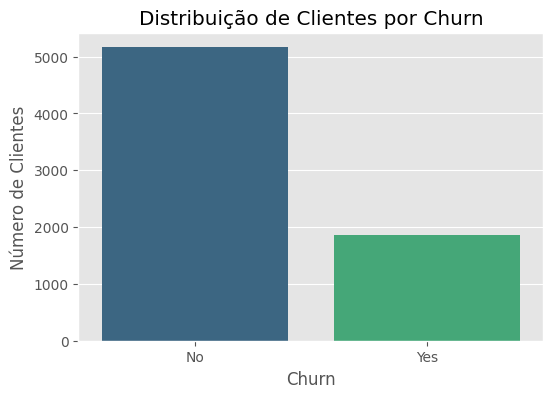

In [33]:
print("### Distribuição da Variável Churn:")
print(df_final['Churn'].value_counts())
print("\n### Percentual de Churn:")
print(df_final['Churn'].value_counts(normalize=True) * 100)

plt.figure(figsize=(6, 4))
sns.countplot(data=df_final, x='Churn', palette='viridis', hue='Churn')
plt.title('Distribuição de Clientes por Churn')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.show()


---
### Análise Univariada de Variáveis Categóricas:

--- Coluna: gender ---
gender
Male      3549
Female    3483
Name: count, dtype: int64
gender
Male      50.469283
Female    49.530717
Name: proportion, dtype: float64


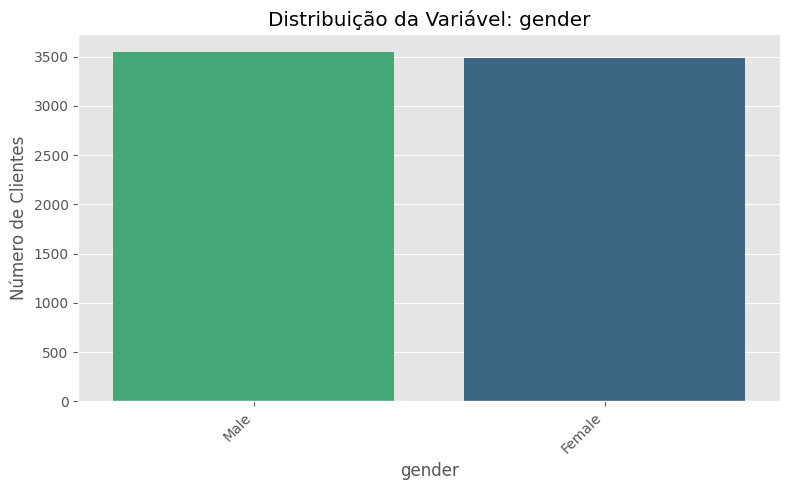


--- Coluna: Partner ---
Partner
No     3639
Yes    3393
Name: count, dtype: int64
Partner
No     51.749147
Yes    48.250853
Name: proportion, dtype: float64


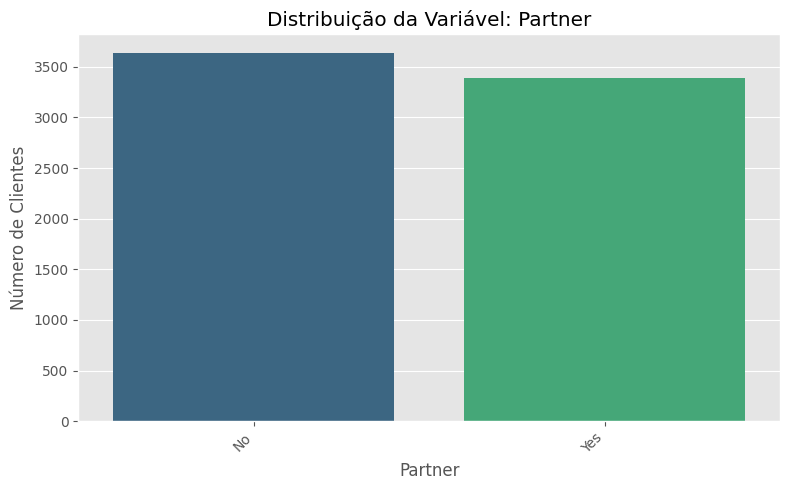


--- Coluna: Dependents ---
Dependents
No     4933
Yes    2099
Name: count, dtype: int64
Dependents
No     70.150739
Yes    29.849261
Name: proportion, dtype: float64


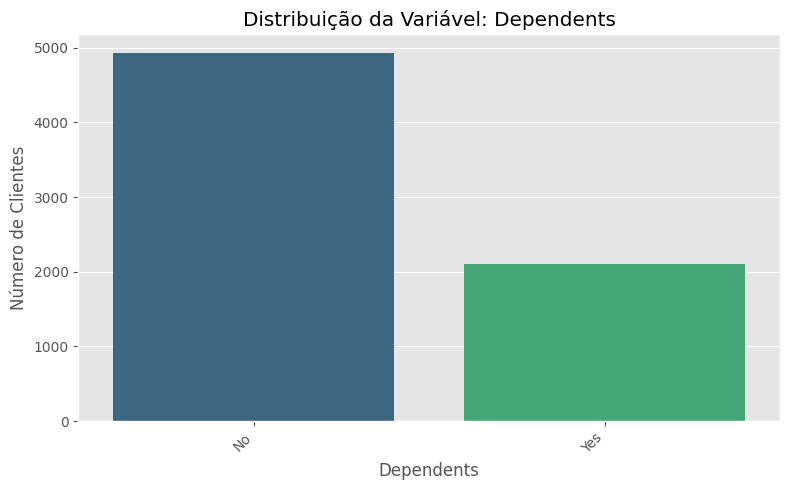


--- Coluna: PhoneService ---
PhoneService
Yes    6352
No      680
Name: count, dtype: int64
PhoneService
Yes    90.32992
No      9.67008
Name: proportion, dtype: float64


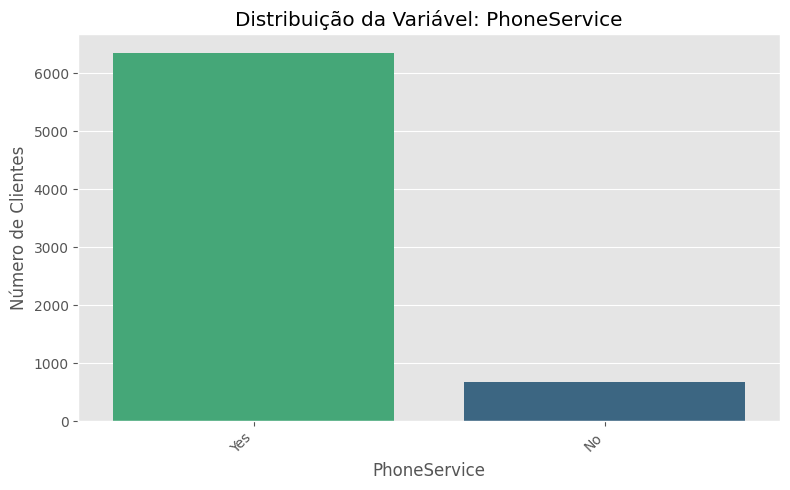


--- Coluna: MultipleLines ---
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64
MultipleLines
No                  48.137088
Yes                 42.192833
No phone service     9.670080
Name: proportion, dtype: float64


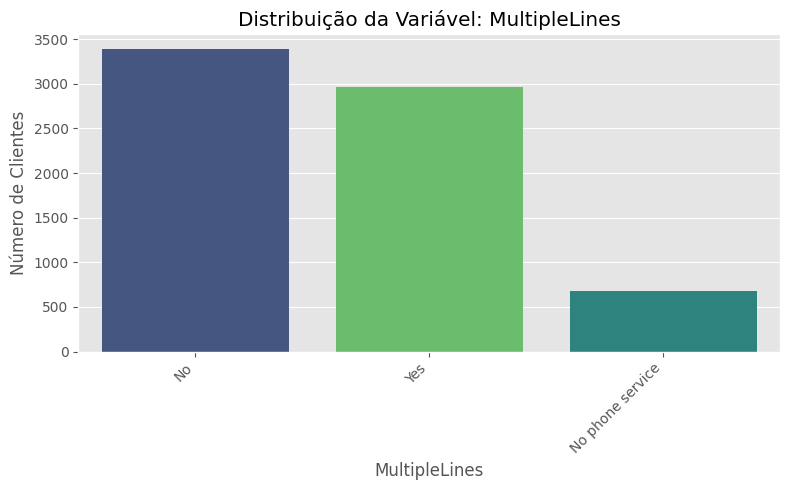


--- Coluna: InternetService ---
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64
InternetService
Fiber optic    44.027304
DSL            34.357224
No             21.615472
Name: proportion, dtype: float64


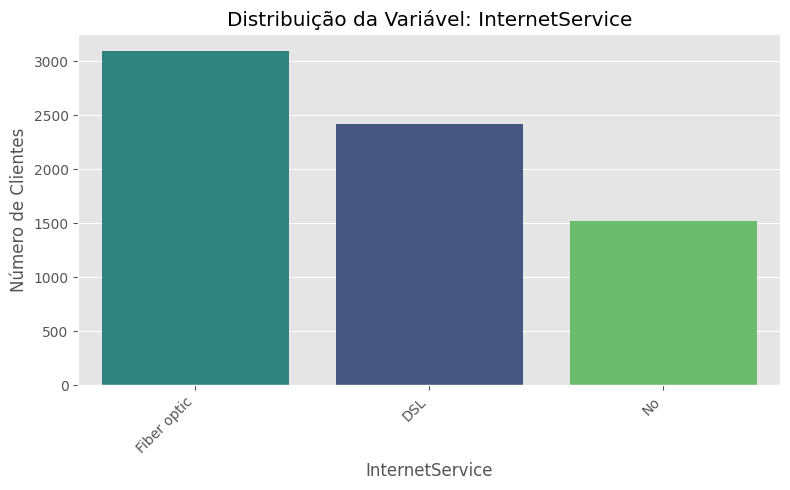


--- Coluna: OnlineSecurity ---
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64
OnlineSecurity
No                     49.729807
Yes                    28.654721
No internet service    21.615472
Name: proportion, dtype: float64


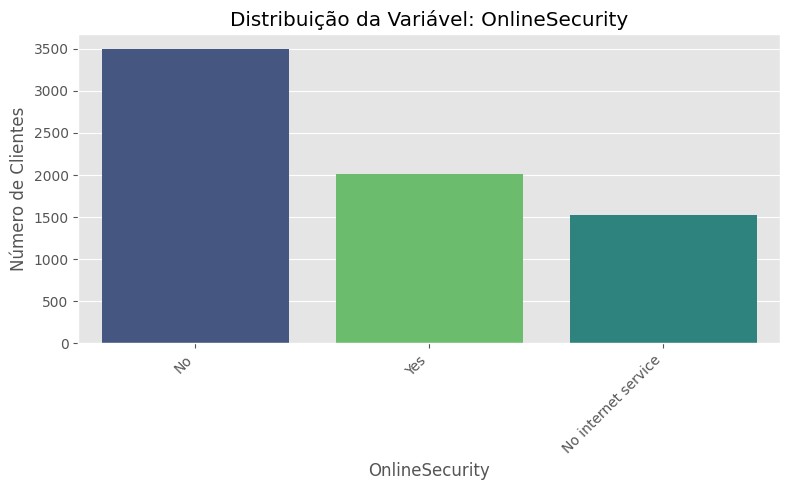


--- Coluna: OnlineBackup ---
OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64
OnlineBackup
No                     43.899317
Yes                    34.485210
No internet service    21.615472
Name: proportion, dtype: float64


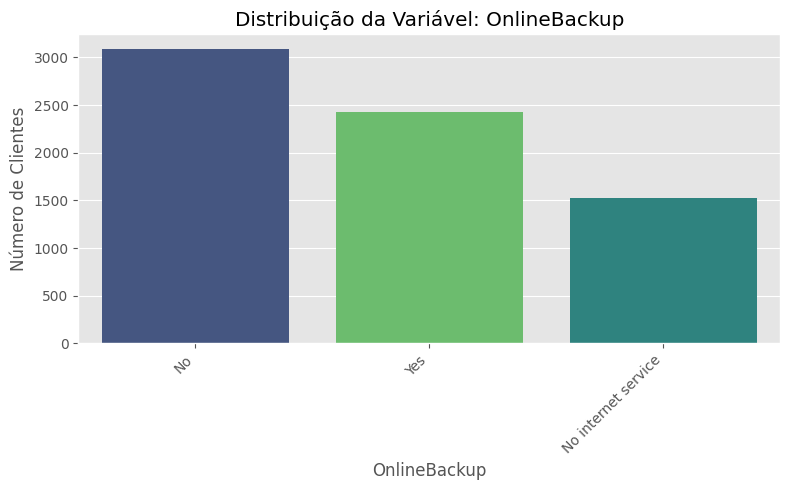


--- Coluna: DeviceProtection ---
DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64
DeviceProtection
No                     43.998862
Yes                    34.385666
No internet service    21.615472
Name: proportion, dtype: float64


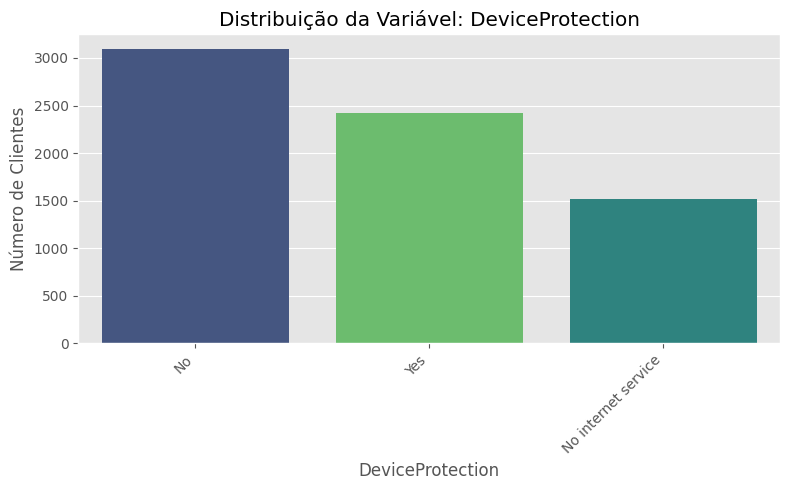


--- Coluna: TechSupport ---
TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64
TechSupport
No                     49.374289
Yes                    29.010239
No internet service    21.615472
Name: proportion, dtype: float64


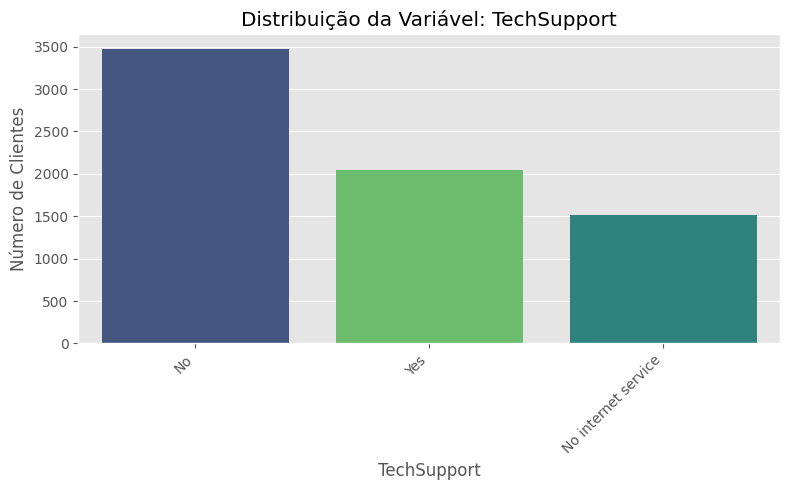


--- Coluna: StreamingTV ---
StreamingTV
No                     2809
Yes                    2703
No internet service    1520
Name: count, dtype: int64
StreamingTV
No                     39.945961
Yes                    38.438567
No internet service    21.615472
Name: proportion, dtype: float64


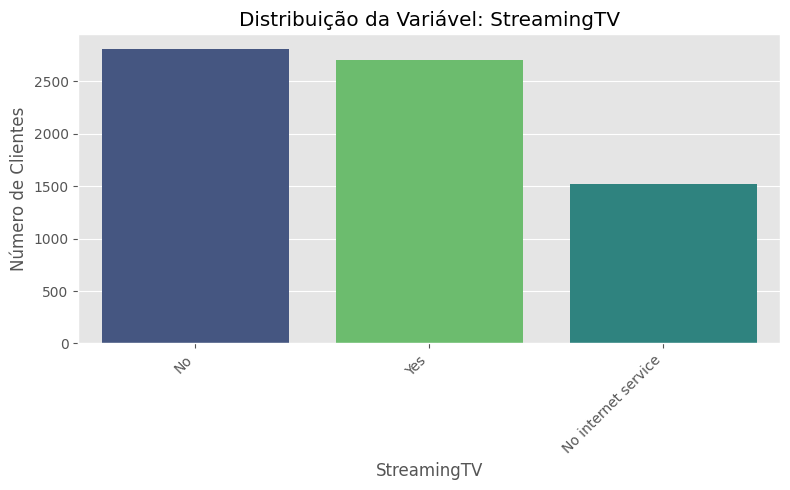


--- Coluna: StreamingMovies ---
StreamingMovies
No                     2781
Yes                    2731
No internet service    1520
Name: count, dtype: int64
StreamingMovies
No                     39.547782
Yes                    38.836746
No internet service    21.615472
Name: proportion, dtype: float64


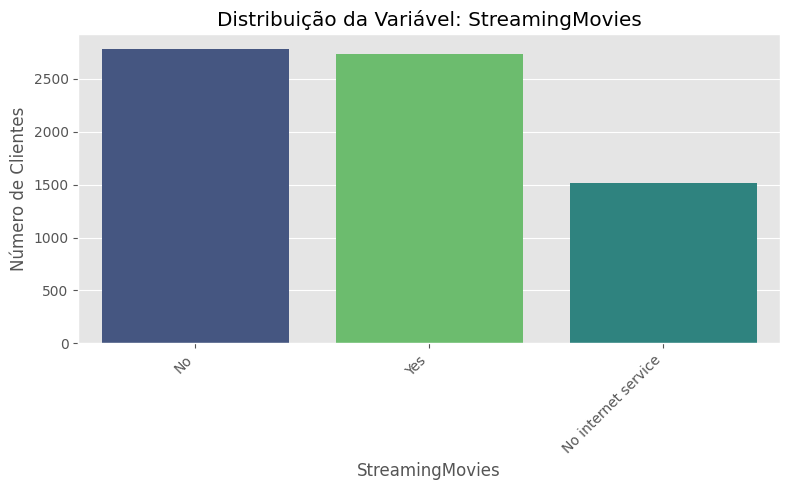


--- Coluna: Contract ---
Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64
Contract
Month-to-month    55.105233
Two year          23.961889
One year          20.932878
Name: proportion, dtype: float64


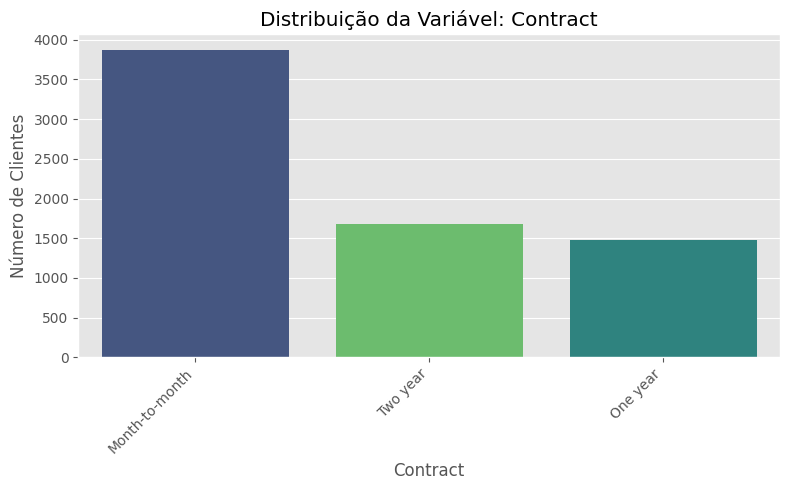


--- Coluna: PaperlessBilling ---
PaperlessBilling
Yes    4168
No     2864
Name: count, dtype: int64
PaperlessBilling
Yes    59.2719
No     40.7281
Name: proportion, dtype: float64


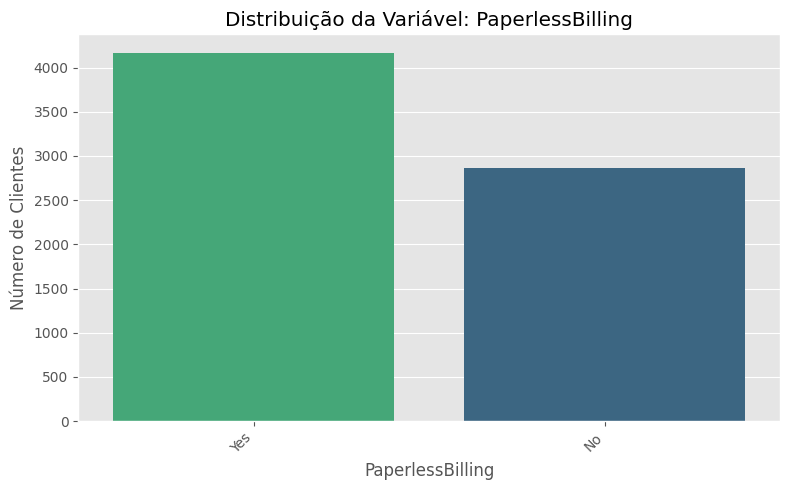


--- Coluna: PaymentMethod ---
PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64
PaymentMethod
Electronic check             33.631968
Mailed check                 22.810011
Bank transfer (automatic)    21.928328
Credit card (automatic)      21.629693
Name: proportion, dtype: float64


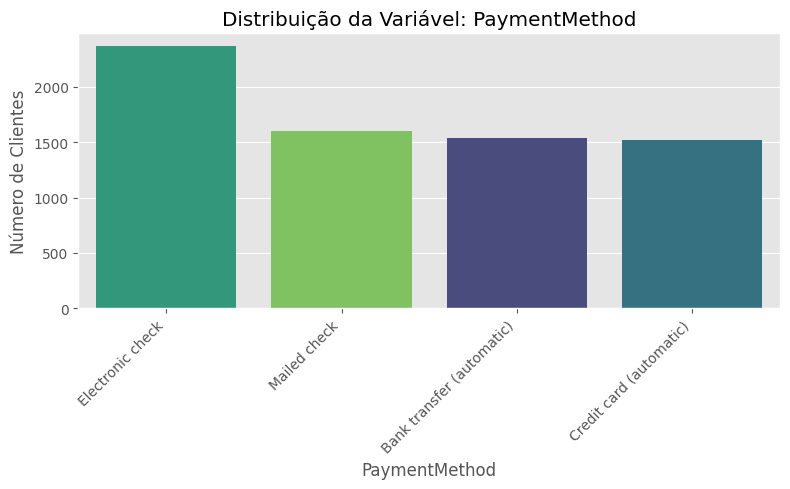


--- Coluna: TenureGroup ---
TenureGroup
0-12 Meses          2175
25-48 Meses         1594
Mais de 60 Meses    1407
13-24 Meses         1024
49-60 Meses          832
Name: count, dtype: int64
TenureGroup
0-12 Meses          30.930034
25-48 Meses         22.667804
Mais de 60 Meses    20.008532
13-24 Meses         14.562002
49-60 Meses         11.831627
Name: proportion, dtype: float64


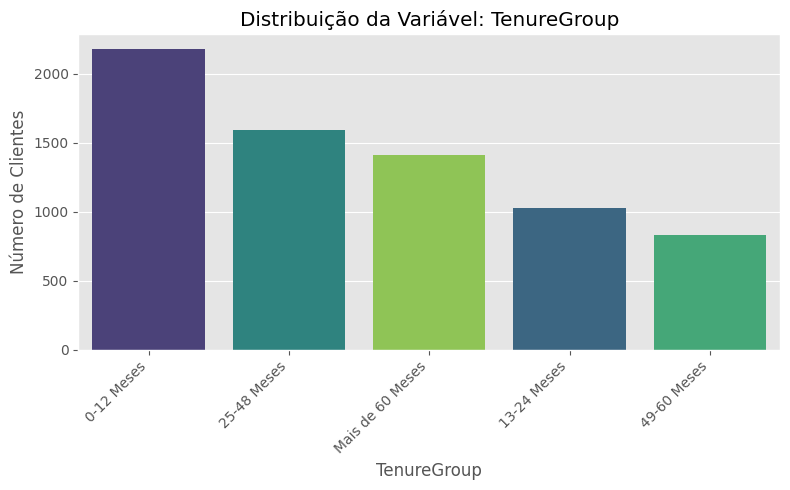

In [41]:
# Liste as colunas categóricas (excluindo 'Churn' pois já foi analisada)
# Lembre-se que 'TenureGroup' é uma nova feature categórica também.
colunas_categoricas_eda = [col for col in df_final.columns if df_final[col].dtype == 'category' and col != 'Churn']

print("\n---")
print("### Análise Univariada de Variáveis Categóricas:")

for col in colunas_categoricas_eda:
    print(f"\n--- Coluna: {col} ---")
    print(df_final[col].value_counts())
    print(df_final[col].value_counts(normalize=True) * 100)

    plt.figure(figsize=(8, 5)) # Ajuste o tamanho do gráfico conforme necessário
    sns.countplot(data=df_final, x=col, palette='viridis', order=df_final[col].value_counts().index, hue=col)
    plt.title(f'Distribuição da Variável: {col}')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
    plt.xticks(rotation=45, ha='right') # Rotaciona rótulos para melhor legibilidade
    plt.tight_layout() # Ajusta o layout para evitar sobreposição
    plt.show()

### 4.2. Análise de Variáveis Numéricas


---
### Análise Univariada de TODAS as Variáveis Categóricas (Incluindo Churn):

--- Coluna: Churn ---
Churn
No     5163
Yes    1869
Name: count, dtype: int64
Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


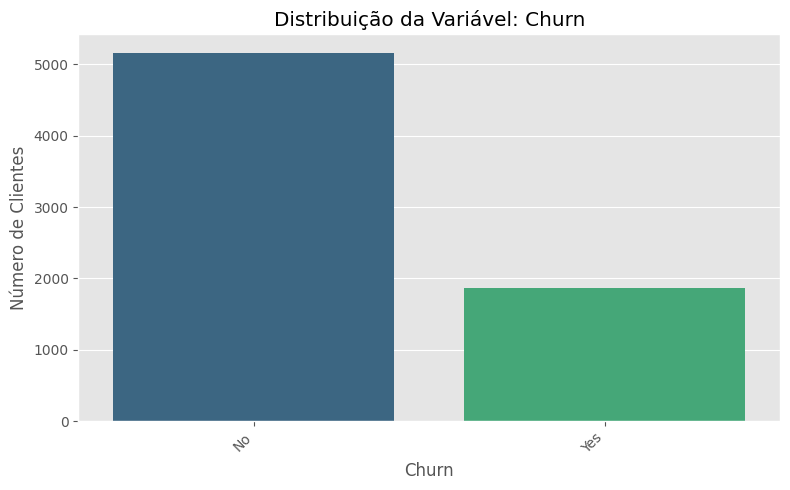


--- Coluna: gender ---
gender
Male      3549
Female    3483
Name: count, dtype: int64
gender
Male      50.469283
Female    49.530717
Name: proportion, dtype: float64


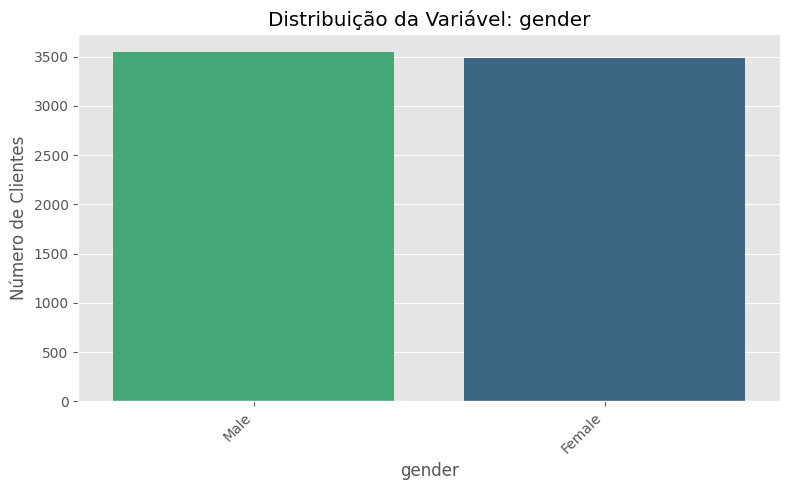


--- Coluna: Partner ---
Partner
No     3639
Yes    3393
Name: count, dtype: int64
Partner
No     51.749147
Yes    48.250853
Name: proportion, dtype: float64


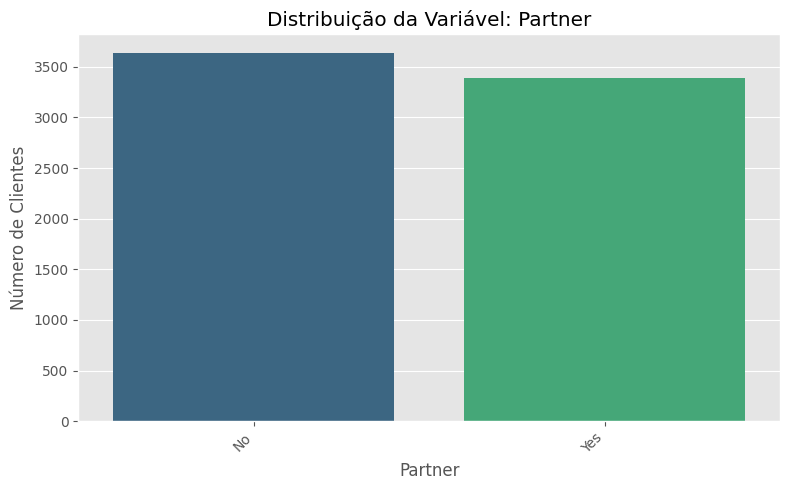


--- Coluna: Dependents ---
Dependents
No     4933
Yes    2099
Name: count, dtype: int64
Dependents
No     70.150739
Yes    29.849261
Name: proportion, dtype: float64


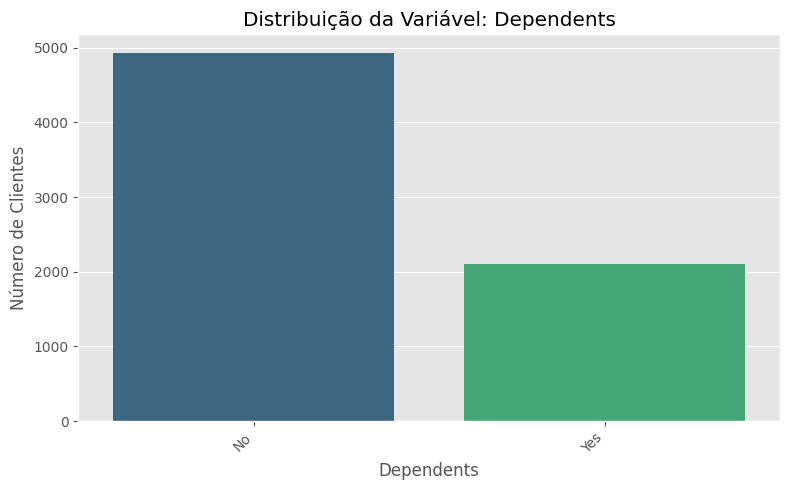


--- Coluna: PhoneService ---
PhoneService
Yes    6352
No      680
Name: count, dtype: int64
PhoneService
Yes    90.32992
No      9.67008
Name: proportion, dtype: float64


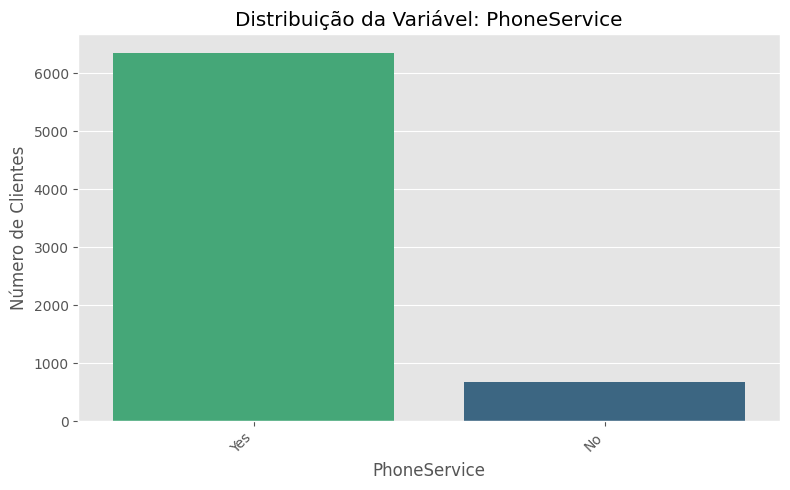


--- Coluna: MultipleLines ---
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64
MultipleLines
No                  48.137088
Yes                 42.192833
No phone service     9.670080
Name: proportion, dtype: float64


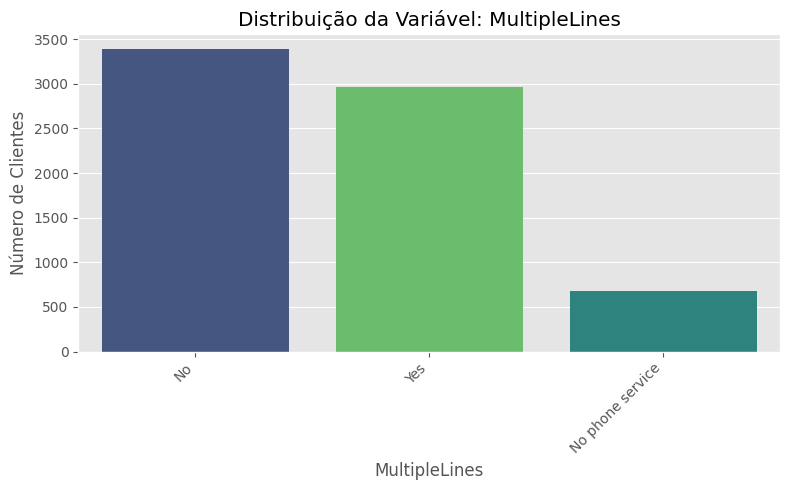


--- Coluna: InternetService ---
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64
InternetService
Fiber optic    44.027304
DSL            34.357224
No             21.615472
Name: proportion, dtype: float64


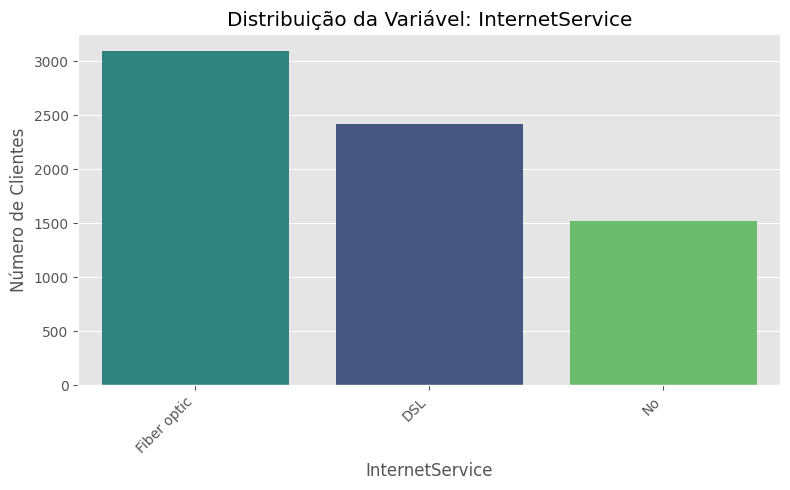


--- Coluna: OnlineSecurity ---
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64
OnlineSecurity
No                     49.729807
Yes                    28.654721
No internet service    21.615472
Name: proportion, dtype: float64


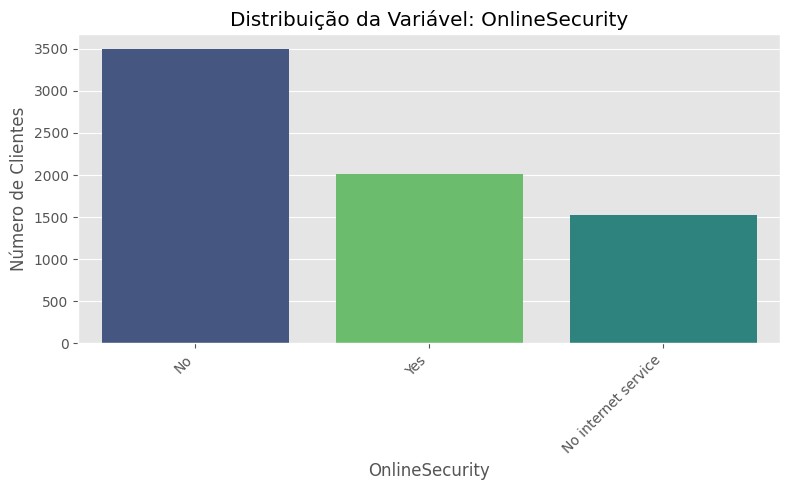


--- Coluna: OnlineBackup ---
OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64
OnlineBackup
No                     43.899317
Yes                    34.485210
No internet service    21.615472
Name: proportion, dtype: float64


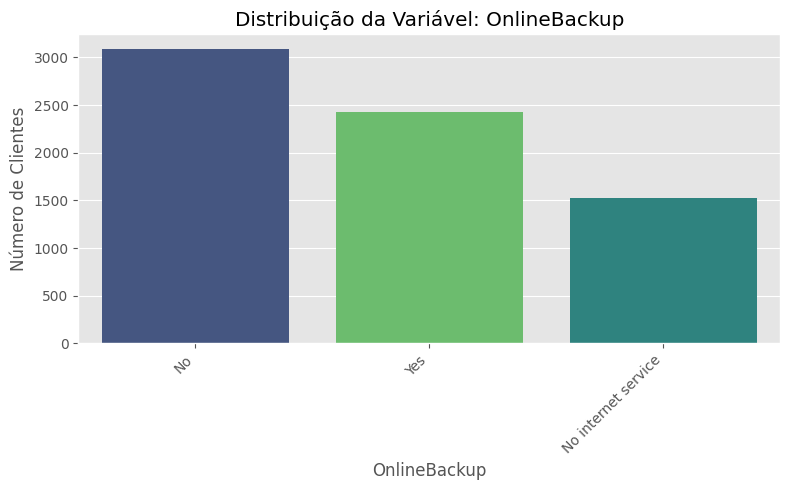


--- Coluna: DeviceProtection ---
DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64
DeviceProtection
No                     43.998862
Yes                    34.385666
No internet service    21.615472
Name: proportion, dtype: float64


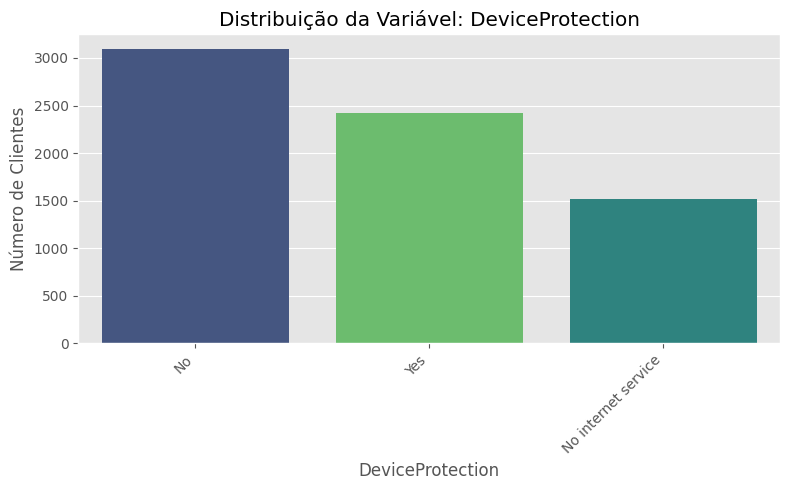


--- Coluna: TechSupport ---
TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64
TechSupport
No                     49.374289
Yes                    29.010239
No internet service    21.615472
Name: proportion, dtype: float64


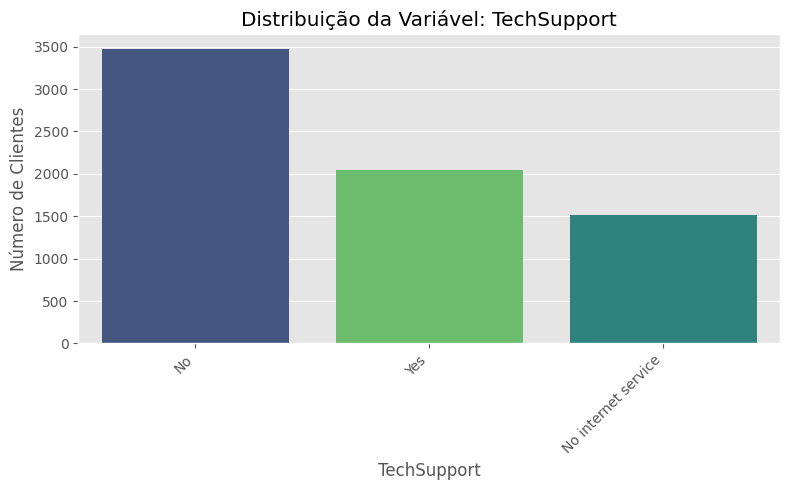


--- Coluna: StreamingTV ---
StreamingTV
No                     2809
Yes                    2703
No internet service    1520
Name: count, dtype: int64
StreamingTV
No                     39.945961
Yes                    38.438567
No internet service    21.615472
Name: proportion, dtype: float64


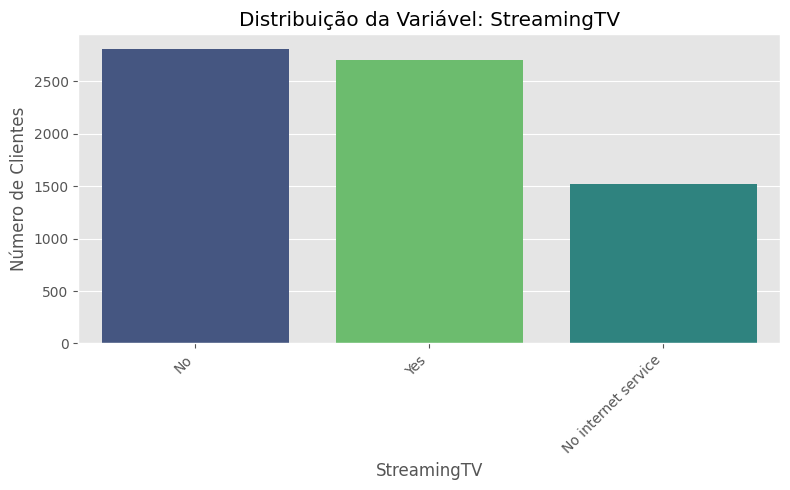


--- Coluna: StreamingMovies ---
StreamingMovies
No                     2781
Yes                    2731
No internet service    1520
Name: count, dtype: int64
StreamingMovies
No                     39.547782
Yes                    38.836746
No internet service    21.615472
Name: proportion, dtype: float64


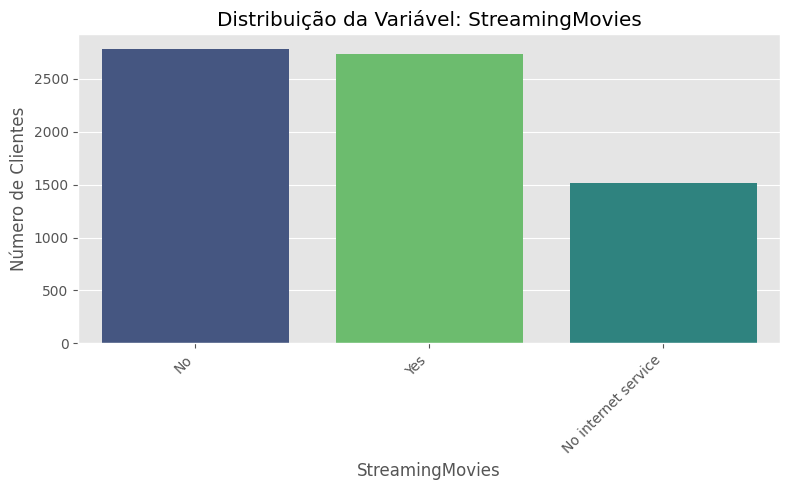


--- Coluna: Contract ---
Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64
Contract
Month-to-month    55.105233
Two year          23.961889
One year          20.932878
Name: proportion, dtype: float64


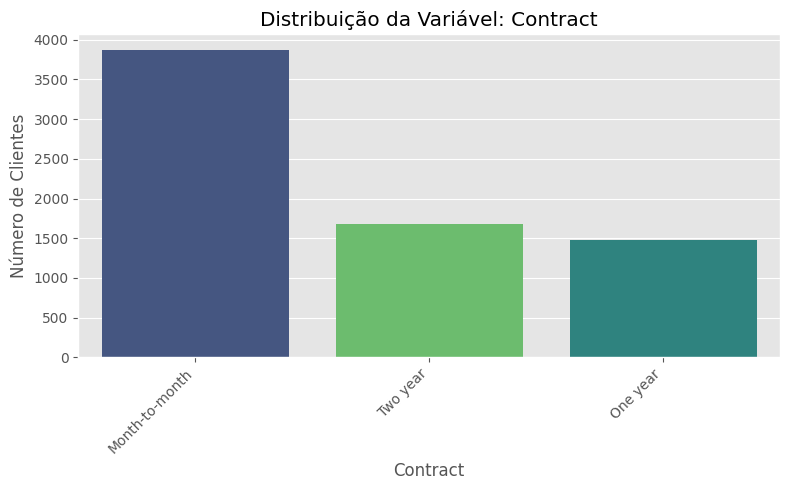


--- Coluna: PaperlessBilling ---
PaperlessBilling
Yes    4168
No     2864
Name: count, dtype: int64
PaperlessBilling
Yes    59.2719
No     40.7281
Name: proportion, dtype: float64


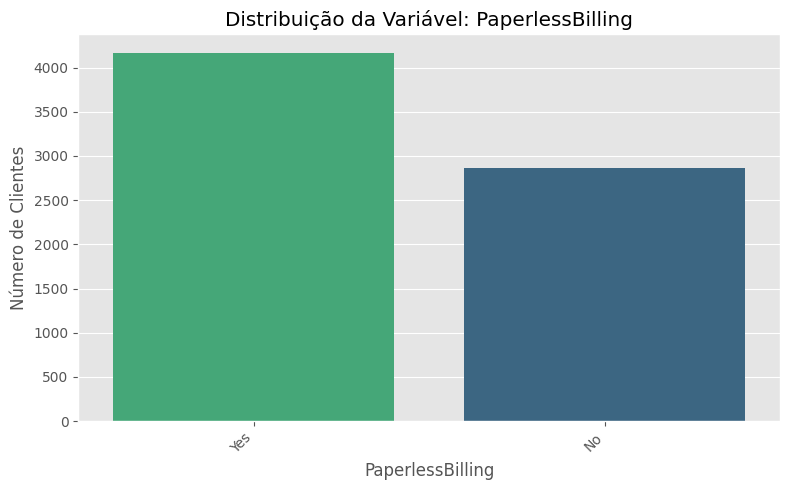


--- Coluna: PaymentMethod ---
PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64
PaymentMethod
Electronic check             33.631968
Mailed check                 22.810011
Bank transfer (automatic)    21.928328
Credit card (automatic)      21.629693
Name: proportion, dtype: float64


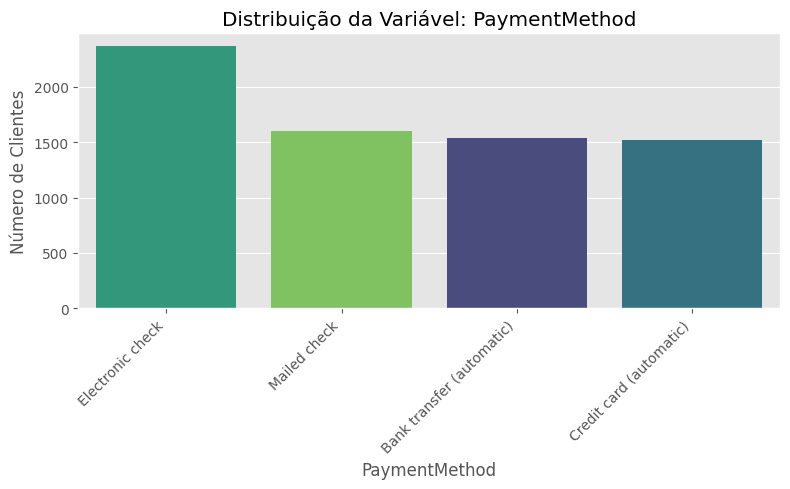


--- Coluna: TenureGroup ---
TenureGroup
0-12 Meses          2175
25-48 Meses         1594
Mais de 60 Meses    1407
13-24 Meses         1024
49-60 Meses          832
Name: count, dtype: int64
TenureGroup
0-12 Meses          30.930034
25-48 Meses         22.667804
Mais de 60 Meses    20.008532
13-24 Meses         14.562002
49-60 Meses         11.831627
Name: proportion, dtype: float64


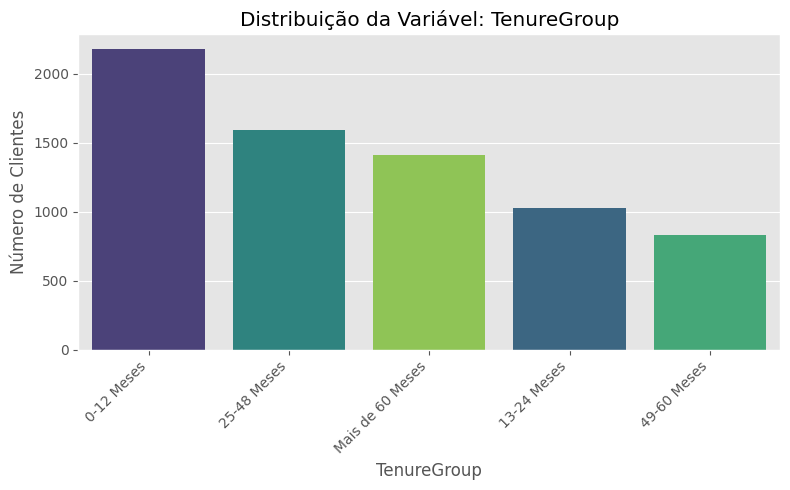


---
### Análise Univariada de Variáveis Numéricas:

--- Coluna: tenure ---

Estatísticas Descritivas:
count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


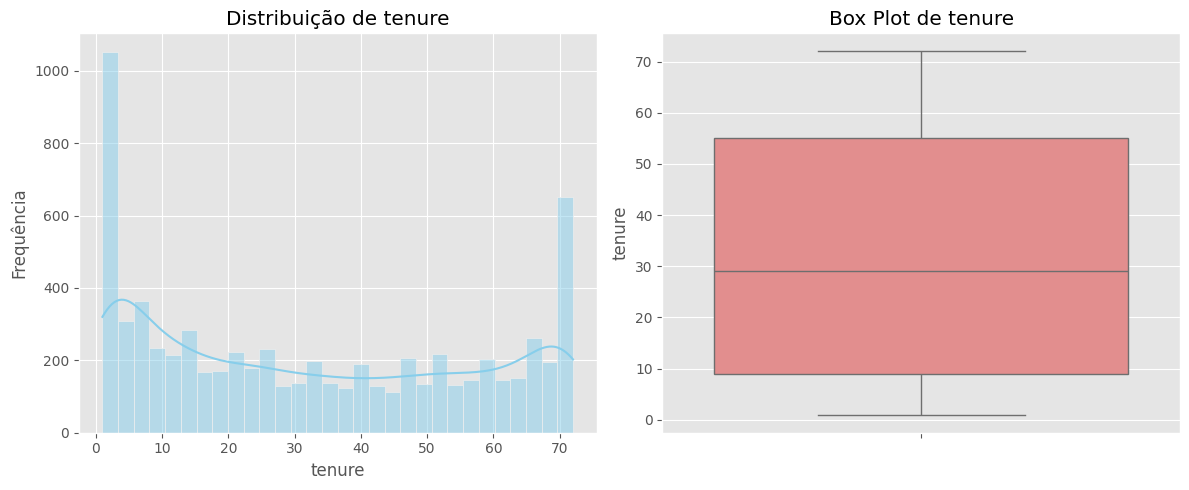


--- Coluna: MonthlyCharges ---

Estatísticas Descritivas:
count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64


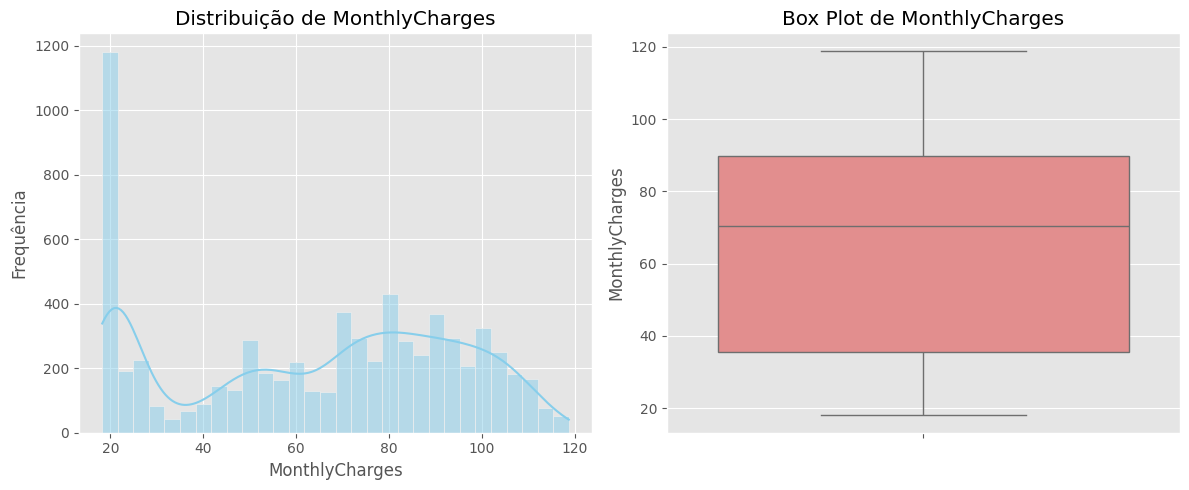


--- Coluna: TotalCharges ---

Estatísticas Descritivas:
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64


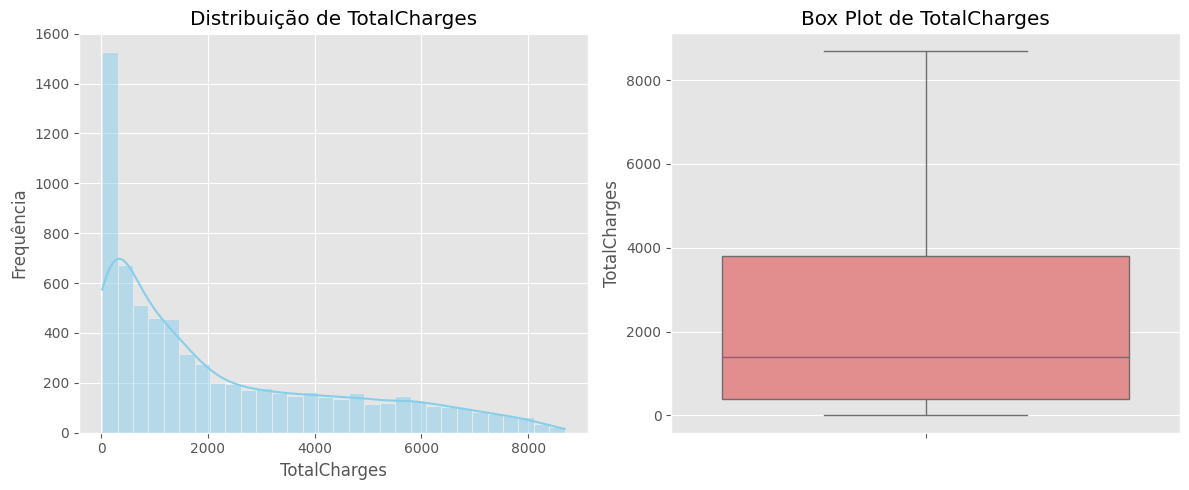

In [46]:
plt.style.use('ggplot')
# %matplotlib inline # Descomente se estiver em um ambiente Jupyter/IPython

# Listar TODAS as colunas categóricas (agora incluindo 'Churn')
colunas_categoricas_todas_eda = [col for col in df_final.columns if df_final[col].dtype == 'category']

print("\n---")
print("### Análise Univariada de TODAS as Variáveis Categóricas (Incluindo Churn):")

for col in colunas_categoricas_todas_eda:
    print(f"\n--- Coluna: {col} ---")
    print(df_final[col].value_counts())
    print(df_final[col].value_counts(normalize=True) * 100)

    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_final, x=col, hue=col, palette='viridis', legend=False, order=df_final[col].value_counts().index)
    plt.title(f'Distribuição da Variável: {col}')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# E agora, a análise univariada das numéricas
colunas_numericas_eda = ['tenure', 'MonthlyCharges', 'TotalCharges']

print("\n---")
print("### Análise Univariada de Variáveis Numéricas:")

for col in colunas_numericas_eda:
    print(f"\n--- Coluna: {col} ---")
    # Estatísticas Descritivas
    print("\nEstatísticas Descritivas:")
    print(df_final[col].describe())

    plt.figure(figsize=(12, 5))

    # Histograma
    plt.subplot(1, 2, 1) # 1 linha, 2 colunas, 1º gráfico
    sns.histplot(df_final[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')

    # Box Plot
    plt.subplot(1, 2, 2) # 1 linha, 2 colunas, 2º gráfico
    sns.boxplot(y=df_final[col], color='lightcoral')
    plt.title(f'Box Plot de {col}')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()

### 4.3. Análise Multivariada (Relação entre variáveis e Churn)


---
### Análise Bivariada: Relação entre Variáveis Categóricas e Churn:


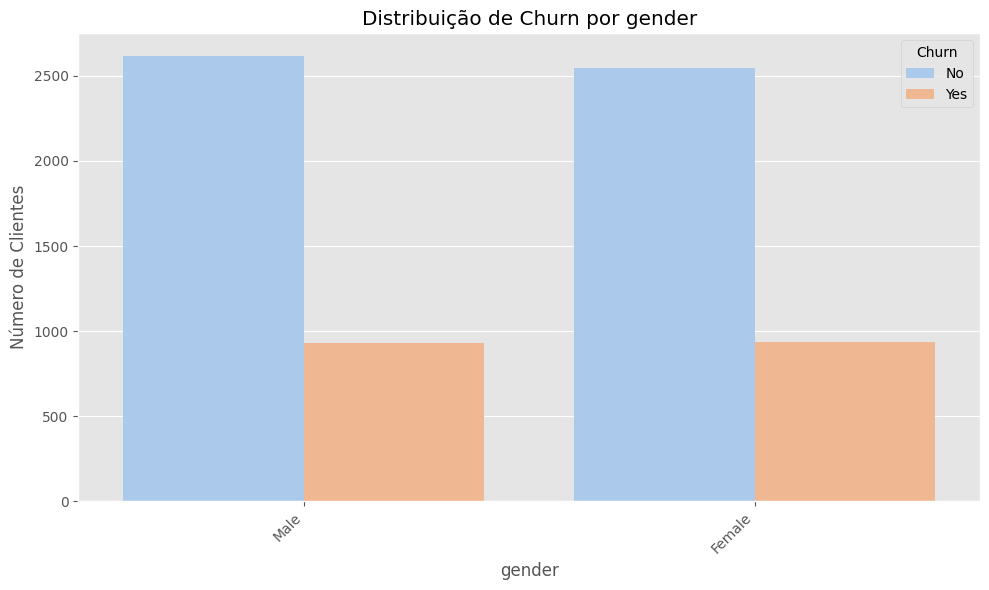


Percentual de Churn por gender:
| gender   |      No |     Yes |
|:---------|--------:|--------:|
| Female   | 73.0405 | 26.9595 |
| Male     | 73.7954 | 26.2046 |
--------------------------------------------------


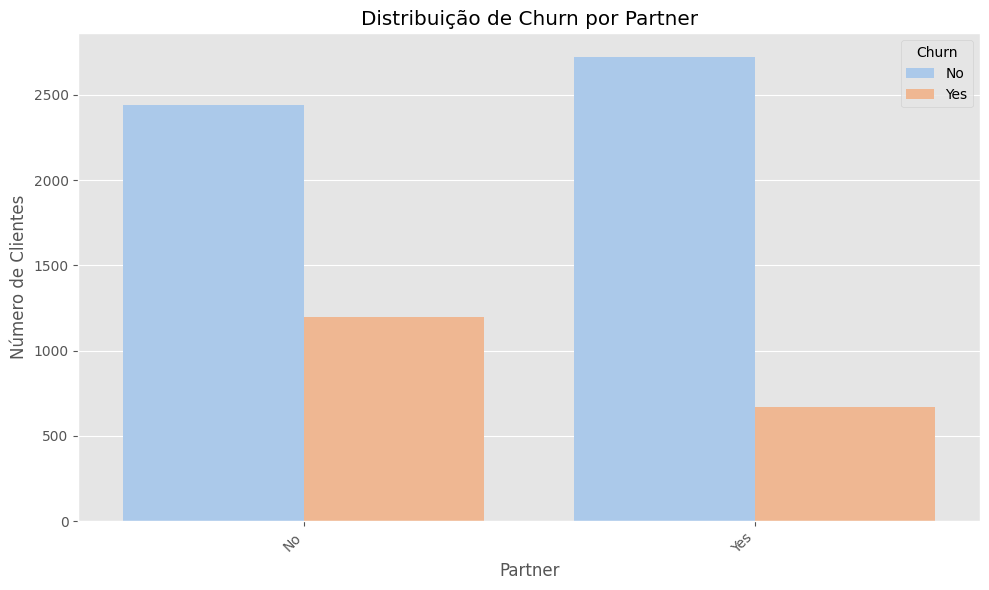


Percentual de Churn por Partner:
| Partner   |      No |     Yes |
|:----------|--------:|--------:|
| No        | 67.0239 | 32.9761 |
| Yes       | 80.2829 | 19.7171 |
--------------------------------------------------


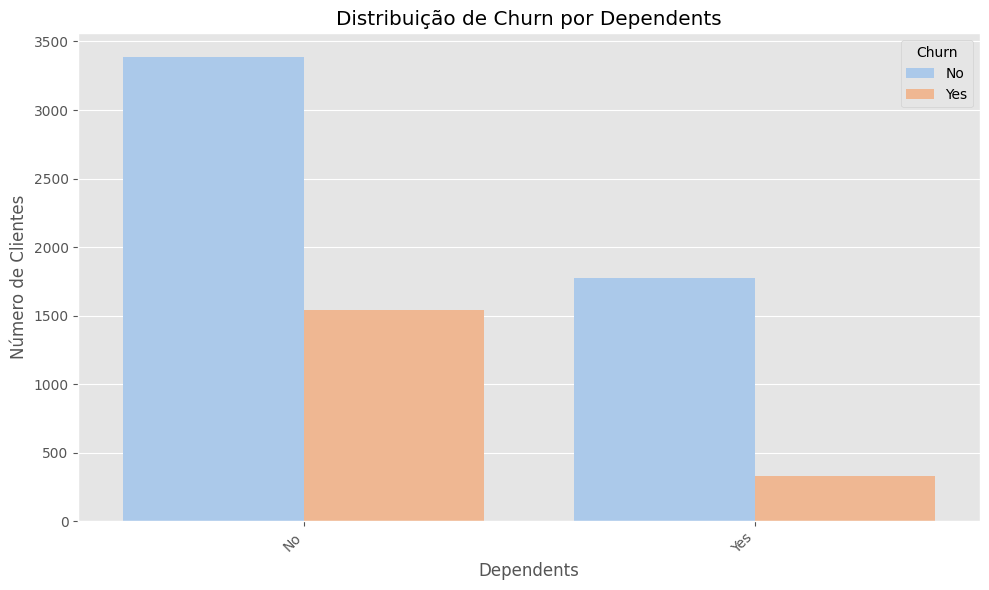


Percentual de Churn por Dependents:
| Dependents   |      No |     Yes |
|:-------------|--------:|--------:|
| No           | 68.7209 | 31.2791 |
| Yes          | 84.4688 | 15.5312 |
--------------------------------------------------


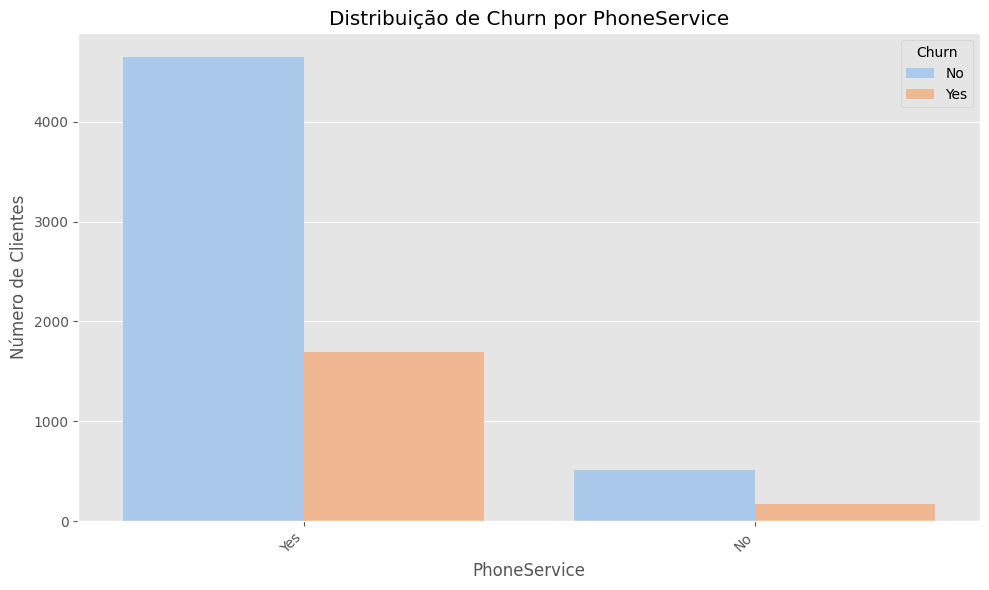


Percentual de Churn por PhoneService:
| PhoneService   |      No |     Yes |
|:---------------|--------:|--------:|
| No             | 75      | 25      |
| Yes            | 73.2525 | 26.7475 |
--------------------------------------------------


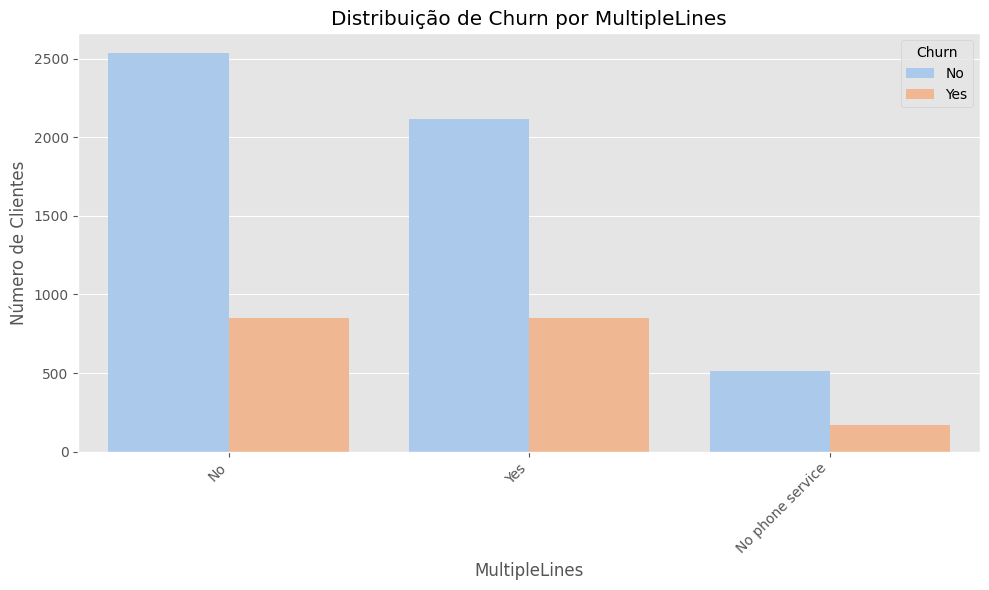


Percentual de Churn por MultipleLines:
| MultipleLines    |      No |     Yes |
|:-----------------|--------:|--------:|
| No               | 74.9188 | 25.0812 |
| No phone service | 75      | 25      |
| Yes              | 71.3515 | 28.6485 |
--------------------------------------------------


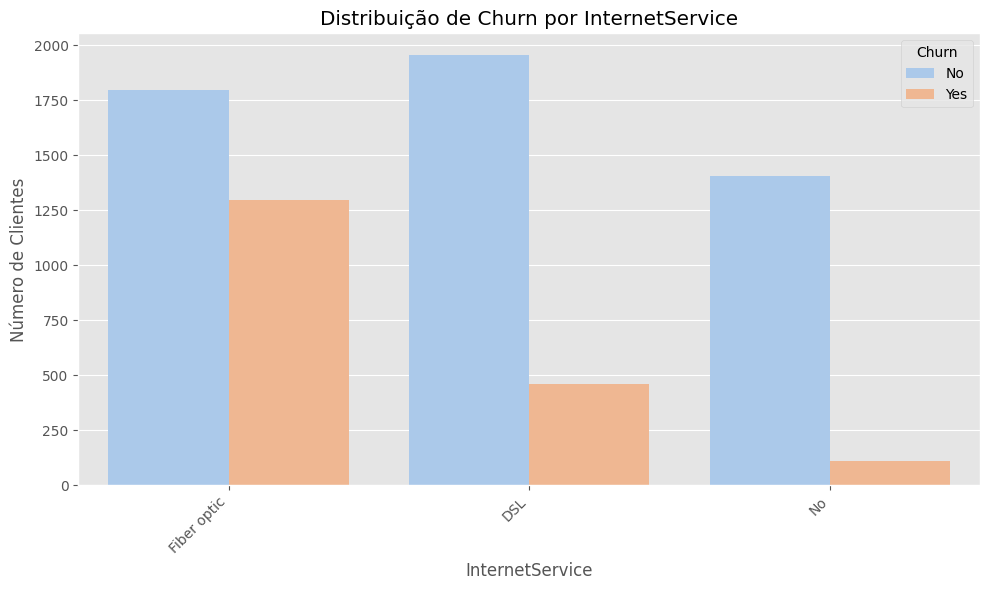


Percentual de Churn por InternetService:
| InternetService   |      No |      Yes |
|:------------------|--------:|---------:|
| DSL               | 81.0017 | 18.9983  |
| Fiber optic       | 58.1072 | 41.8928  |
| No                | 92.5658 |  7.43421 |
--------------------------------------------------


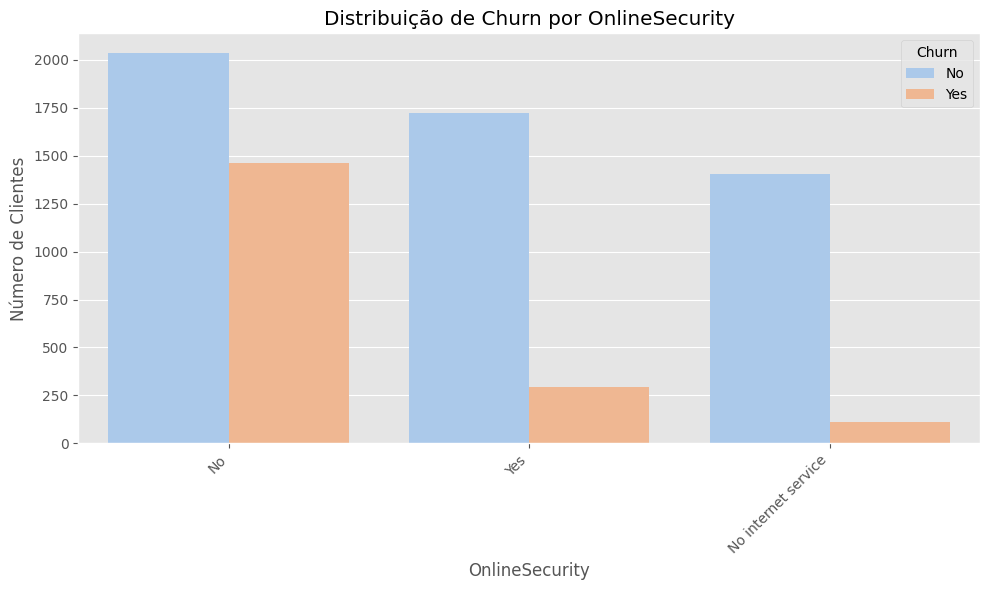


Percentual de Churn por OnlineSecurity:
| OnlineSecurity      |      No |      Yes |
|:--------------------|--------:|---------:|
| No                  | 58.2213 | 41.7787  |
| No internet service | 92.5658 |  7.43421 |
| Yes                 | 85.3598 | 14.6402  |
--------------------------------------------------


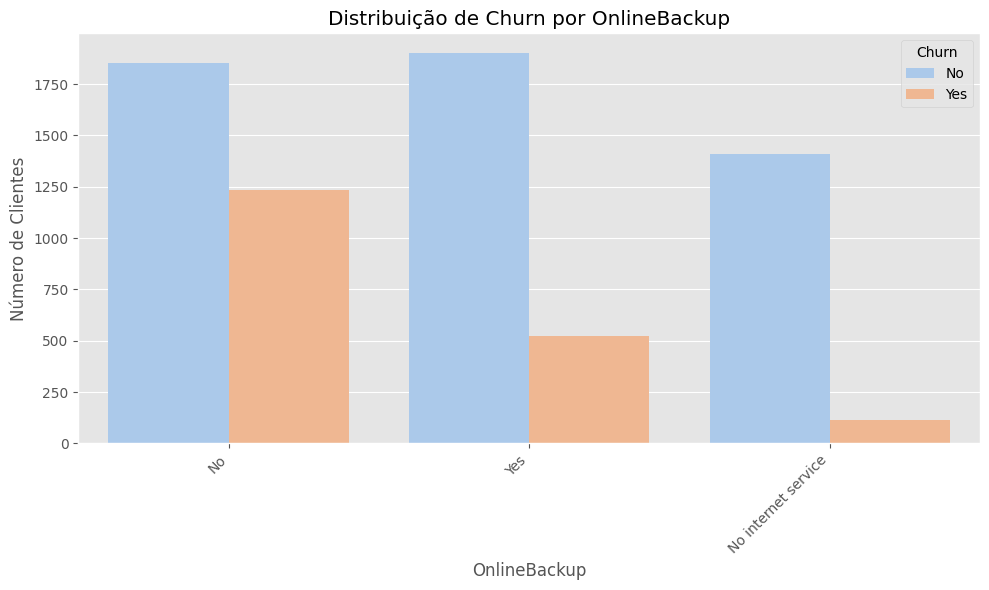


Percentual de Churn por OnlineBackup:
| OnlineBackup        |      No |      Yes |
|:--------------------|--------:|---------:|
| No                  | 60.0583 | 39.9417  |
| No internet service | 92.5658 |  7.43421 |
| Yes                 | 78.433  | 21.567   |
--------------------------------------------------


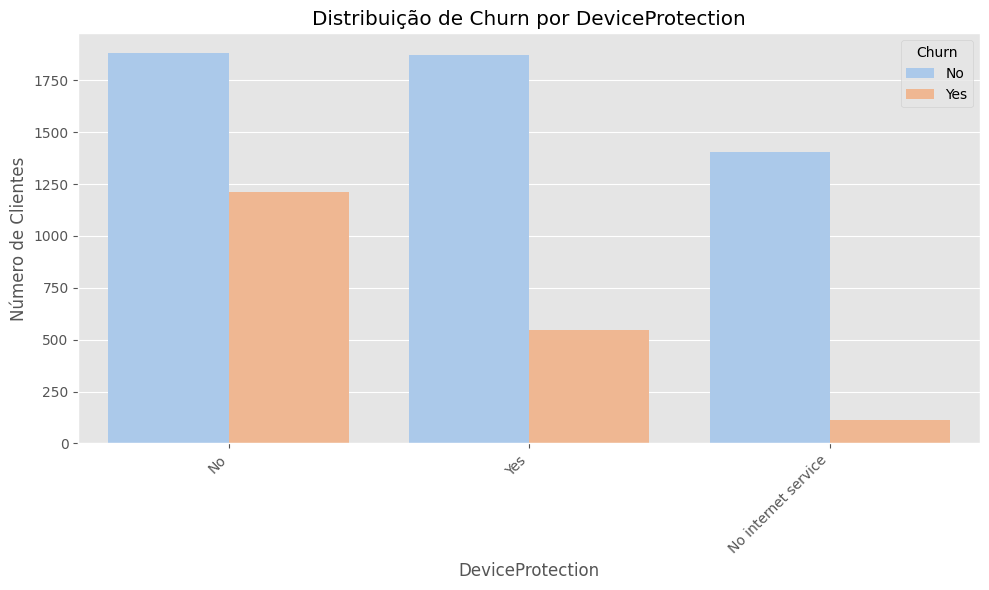


Percentual de Churn por DeviceProtection:
| DeviceProtection    |      No |      Yes |
|:--------------------|--------:|---------:|
| No                  | 60.8597 | 39.1403  |
| No internet service | 92.5658 |  7.43421 |
| Yes                 | 77.4607 | 22.5393  |
--------------------------------------------------


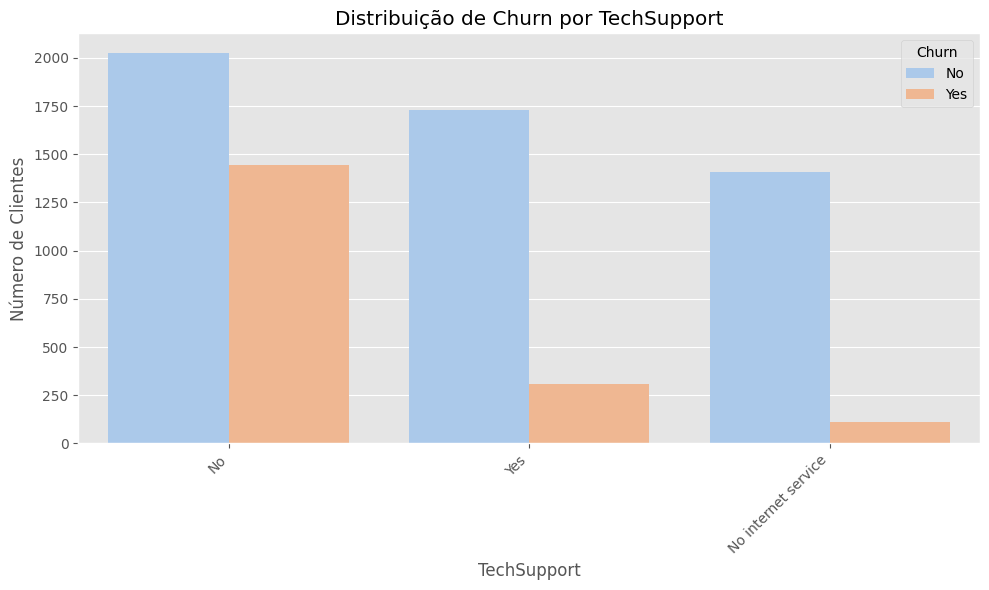


Percentual de Churn por TechSupport:
| TechSupport         |      No |      Yes |
|:--------------------|--------:|---------:|
| No                  | 58.3525 | 41.6475  |
| No internet service | 92.5658 |  7.43421 |
| Yes                 | 84.8039 | 15.1961  |
--------------------------------------------------


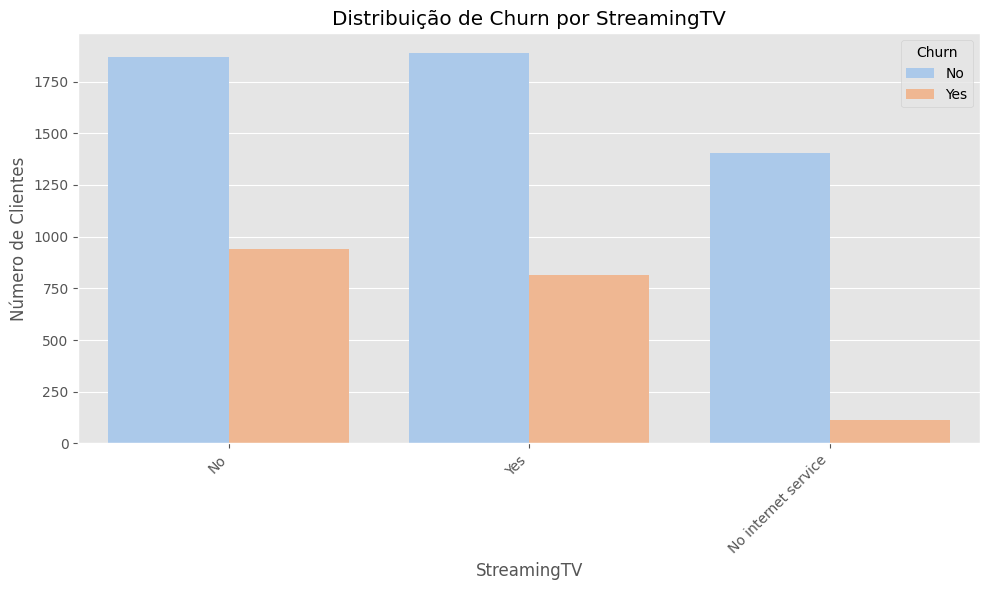


Percentual de Churn por StreamingTV:
| StreamingTV         |      No |      Yes |
|:--------------------|--------:|---------:|
| No                  | 66.4649 | 33.5351  |
| No internet service | 92.5658 |  7.43421 |
| Yes                 | 69.8853 | 30.1147  |
--------------------------------------------------


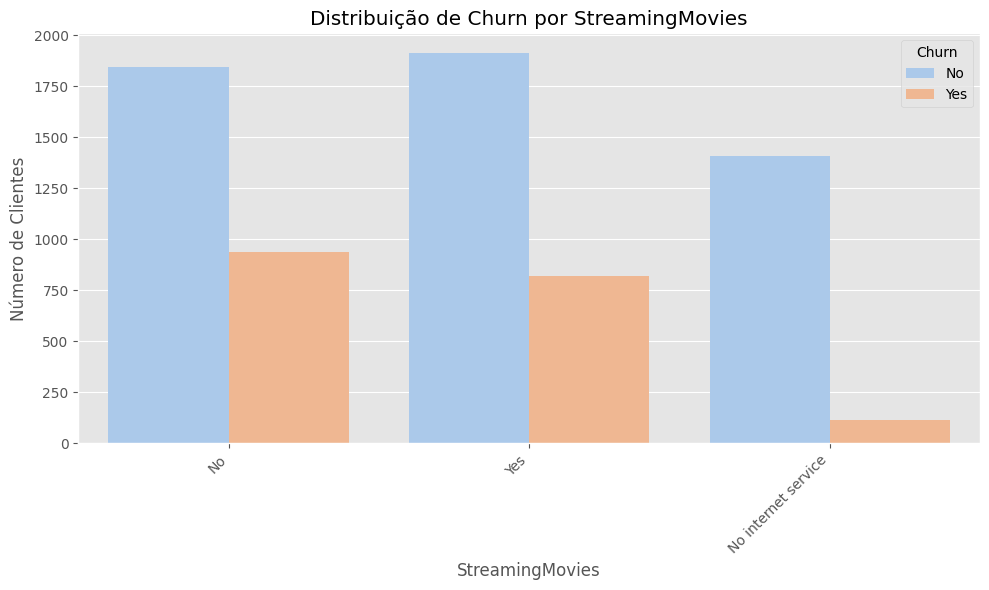


Percentual de Churn por StreamingMovies:
| StreamingMovies     |      No |      Yes |
|:--------------------|--------:|---------:|
| No                  | 66.2711 | 33.7289  |
| No internet service | 92.5658 |  7.43421 |
| Yes                 | 70.0476 | 29.9524  |
--------------------------------------------------


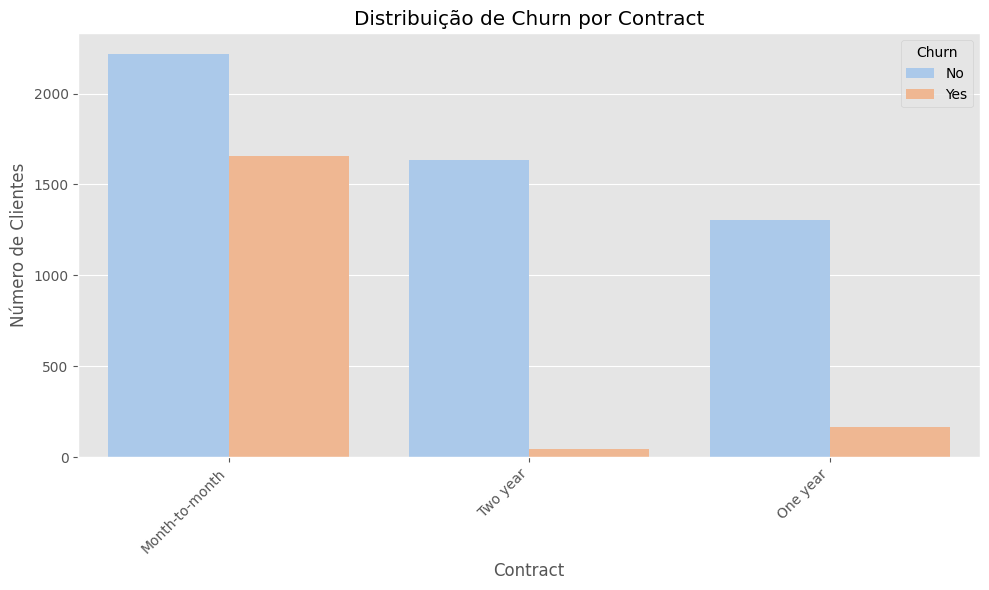


Percentual de Churn por Contract:
| Contract       |      No |      Yes |
|:---------------|--------:|---------:|
| Month-to-month | 57.2903 | 42.7097  |
| One year       | 88.7228 | 11.2772  |
| Two year       | 97.1513 |  2.84866 |
--------------------------------------------------


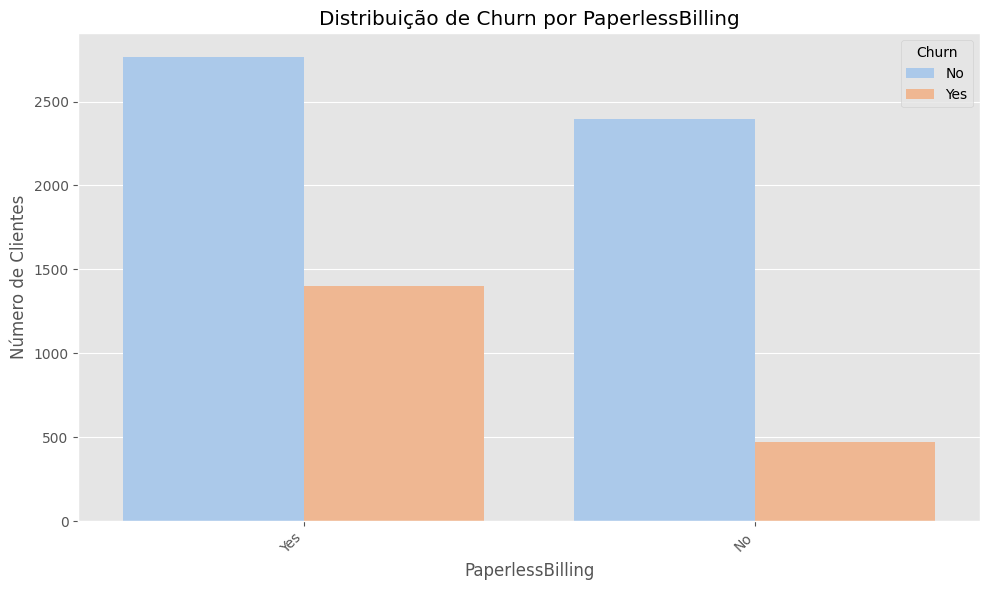


Percentual de Churn por PaperlessBilling:
| PaperlessBilling   |      No |     Yes |
|:-------------------|--------:|--------:|
| No                 | 83.6243 | 16.3757 |
| Yes                | 66.4107 | 33.5893 |
--------------------------------------------------


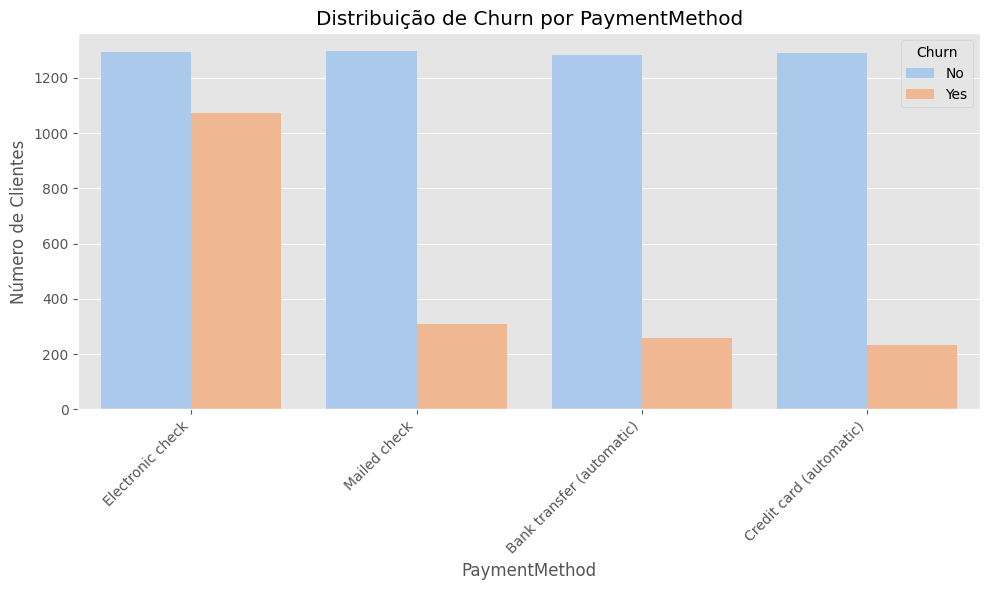


Percentual de Churn por PaymentMethod:
| PaymentMethod             |      No |     Yes |
|:--------------------------|--------:|--------:|
| Bank transfer (automatic) | 83.2685 | 16.7315 |
| Credit card (automatic)   | 84.7469 | 15.2531 |
| Electronic check          | 54.7146 | 45.2854 |
| Mailed check              | 80.798  | 19.202  |
--------------------------------------------------


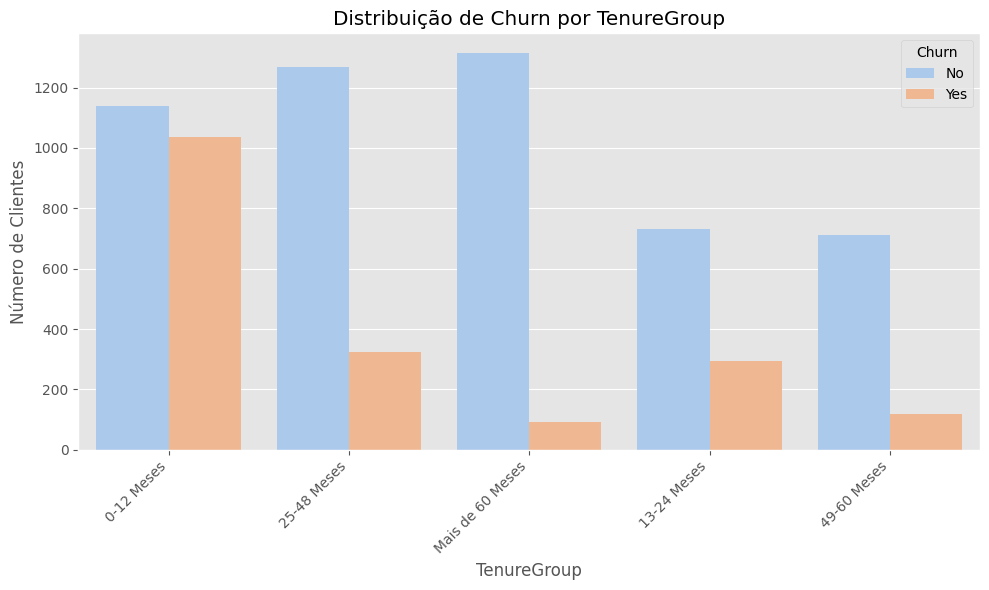


Percentual de Churn por TenureGroup:
| TenureGroup      |      No |      Yes |
|:-----------------|--------:|---------:|
| 0-12 Meses       | 52.3218 | 47.6782  |
| 13-24 Meses      | 71.2891 | 28.7109  |
| 25-48 Meses      | 79.611  | 20.389   |
| 49-60 Meses      | 85.5769 | 14.4231  |
| Mais de 60 Meses | 93.3902 |  6.60981 |
--------------------------------------------------


In [48]:
plt.style.use('ggplot')
# %matplotlib inline # Descomente se estiver em um ambiente Jupyter/IPython

# Listar TODAS as colunas categóricas (excluindo 'customerID' que não é para análise e 'Churn' é o hue)
colunas_categoricas_para_bivariada = [col for col in df_final.columns if df_final[col].dtype == 'category' and col != 'Churn']

print("\n---")
print("### Análise Bivariada: Relação entre Variáveis Categóricas e Churn:")

for col in colunas_categoricas_para_bivariada:
    plt.figure(figsize=(10, 6)) # Ajuste o tamanho para melhor visualização
    # Plotar o countplot com 'Churn' como hue
    sns.countplot(data=df_final, x=col, hue='Churn', palette='pastel', order=df_final[col].value_counts().index)
    plt.title(f'Distribuição de Churn por {col}')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Churn') # Exibe a legenda para 'Yes' e 'No'
    plt.tight_layout()
    plt.show()

    # Opcional: Para ter os percentuais de churn por categoria (mais impactante para o negócio)
    # Calcule os percentuais de churn para cada categoria
    churn_percent = df_final.groupby(col, observed=False)['Churn'].value_counts(normalize=True).unstack() * 100
    print(f"\nPercentual de Churn por {col}:")
    print(churn_percent.to_markdown())
    print("-" * 50) # Separador para facilitar a leitura


---
### Análise Bivariada: Relação entre Variáveis Numéricas e Churn:


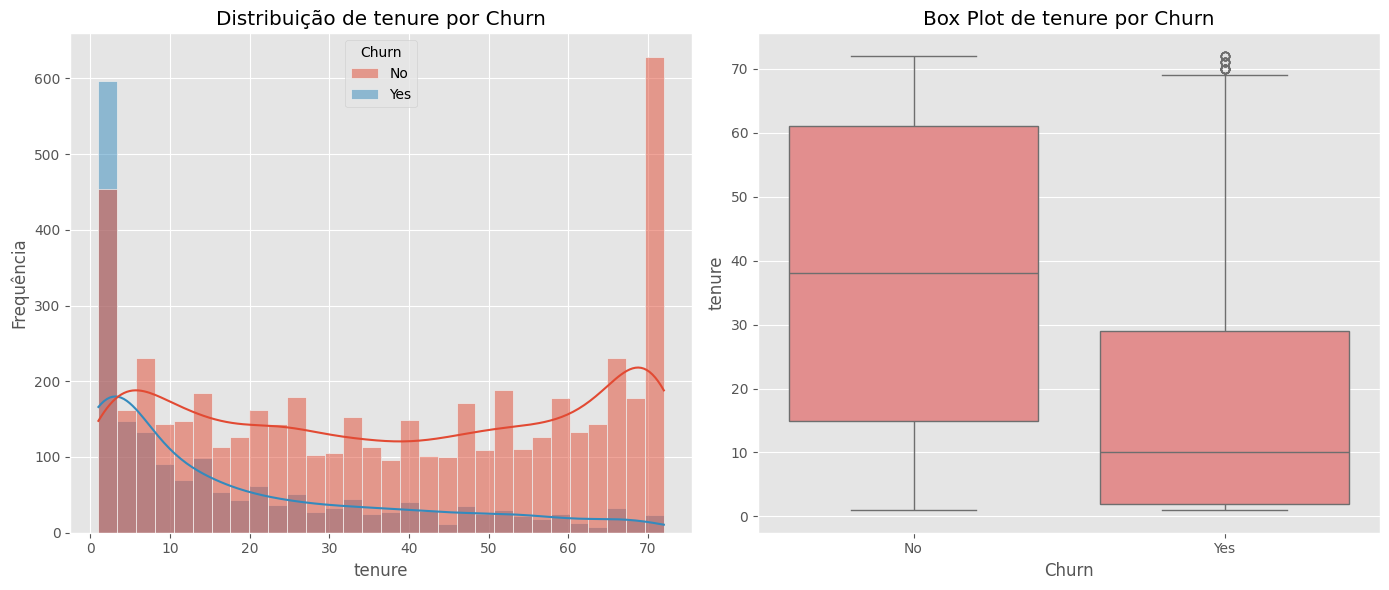


Estatísticas Descritivas de tenure por Churn:
| Churn   |   count |    mean |     std |   min |   25% |   50% |   75% |   max |
|:--------|--------:|--------:|--------:|------:|------:|------:|------:|------:|
| No      |    5163 | 37.65   | 24.0769 |     1 |    15 |    38 |    61 |    72 |
| Yes     |    1869 | 17.9791 | 19.5311 |     1 |     2 |    10 |    29 |    72 |
--------------------------------------------------


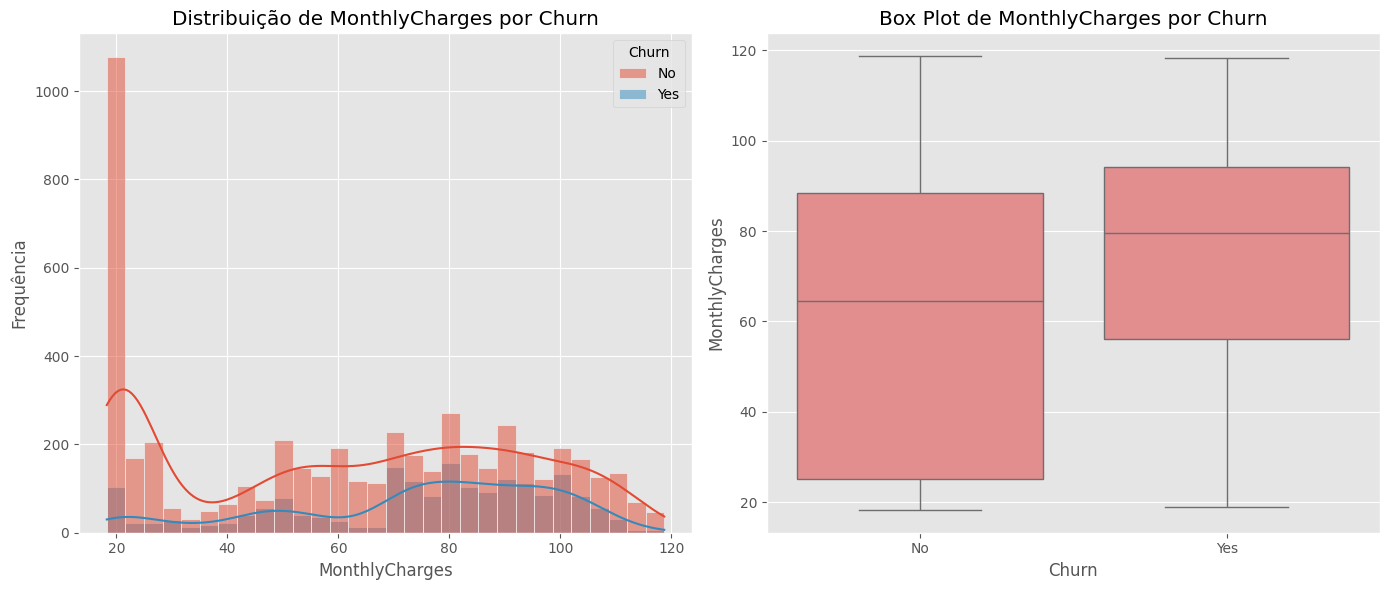


Estatísticas Descritivas de MonthlyCharges por Churn:
| Churn   |   count |    mean |     std |   min |   25% |   50% |    75% |    max |
|:--------|--------:|--------:|--------:|------:|------:|------:|-------:|-------:|
| No      |    5163 | 61.3074 | 31.0946 | 18.25 | 25.1  | 64.45 | 88.475 | 118.75 |
| Yes     |    1869 | 74.4413 | 24.6661 | 18.85 | 56.15 | 79.65 | 94.2   | 118.35 |
--------------------------------------------------


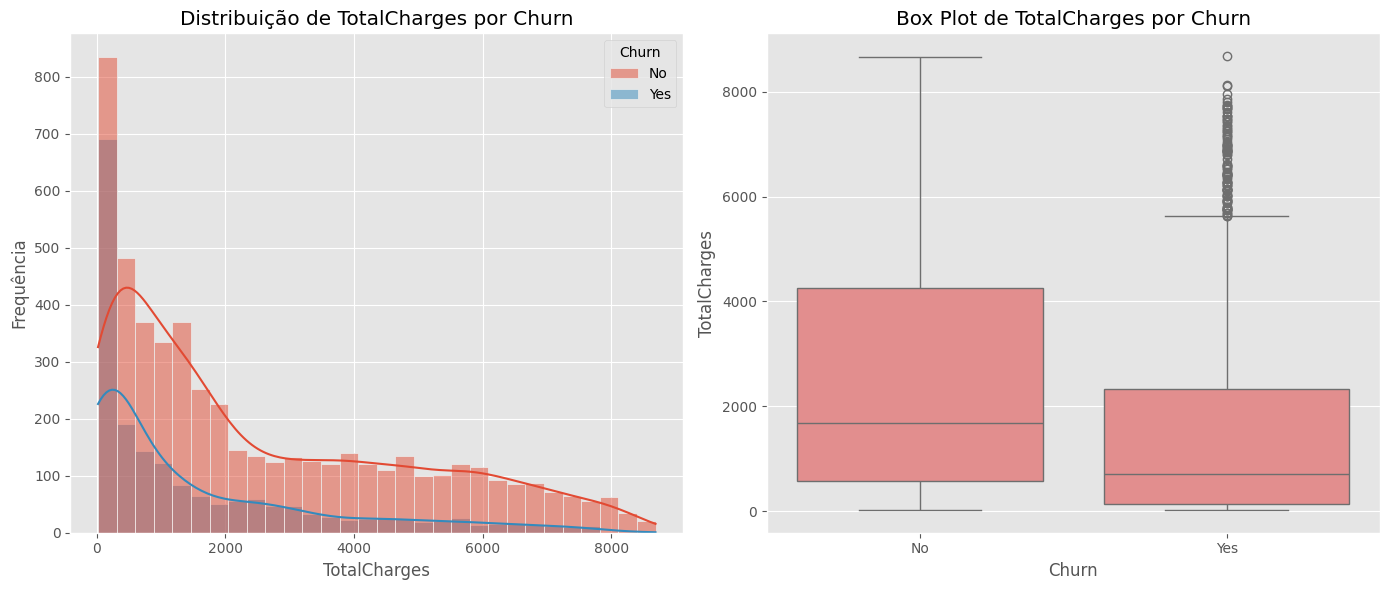


Estatísticas Descritivas de TotalCharges por Churn:
| Churn   |   count |    mean |     std |   min |     25% |     50% |     75% |     max |
|:--------|--------:|--------:|--------:|------:|--------:|--------:|--------:|--------:|
| No      |    5163 | 2555.34 | 2329.46 | 18.8  | 577.825 | 1683.6  | 4264.12 | 8672.45 |
| Yes     |    1869 | 1531.8  | 1890.82 | 18.85 | 134.5   |  703.55 | 2331.3  | 8684.8  |
--------------------------------------------------


In [65]:
plt.style.use('ggplot')
# %matplotlib inline # Descomente se estiver em um ambiente Jupyter/IPython

colunas_numericas_eda = ['tenure', 'MonthlyCharges', 'TotalCharges']

print("\n---")
print("### Análise Bivariada: Relação entre Variáveis Numéricas e Churn:")

for col in colunas_numericas_eda:
    plt.figure(figsize=(14, 6))

    # Histograma para Churn 'No' vs 'Yes'
    plt.subplot(1, 2, 1)
    sns.histplot(data=df_final, x=col, hue='Churn', kde=True, bins=30, color='skyblue')
    plt.title(f'Distribuição de {col} por Churn')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    #plt.legend(title='Churn')

    # Box Plot para Churn 'No' vs 'Yes'
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df_final, x='Churn', y=col, color='lightcoral')
    plt.title(f'Box Plot de {col} por Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()

    # Opcional: Estatísticas descritivas para cada grupo de Churn
    print(f"\nEstatísticas Descritivas de {col} por Churn:")
    print(df_final.groupby('Churn',observed=False)[col].describe().to_markdown())
    print("-" * 50)


---
### Análise de Correlação entre Variáveis Numéricas:

Matriz de Correlação:
|                |   tenure |   MonthlyCharges |   TotalCharges |   DailyCharges |
|:---------------|---------:|-----------------:|---------------:|---------------:|
| tenure         | 1        |         0.246862 |       0.82588  |       0.246862 |
| MonthlyCharges | 0.246862 |         1        |       0.651065 |       1        |
| TotalCharges   | 0.82588  |         0.651065 |       1        |       0.651065 |
| DailyCharges   | 0.246862 |         1        |       0.651065 |       1        |


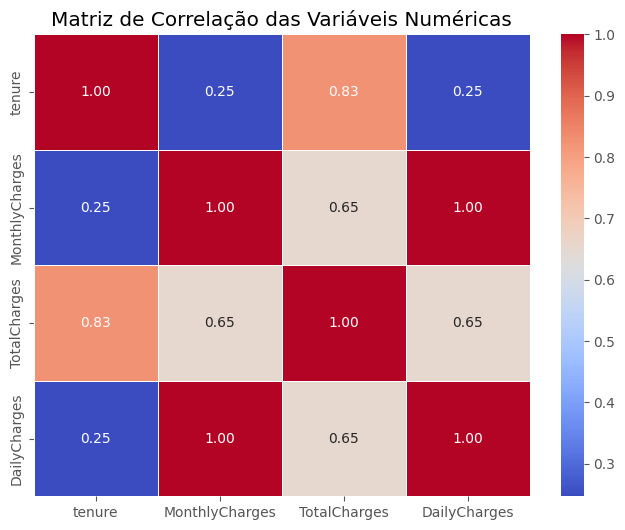

In [56]:
plt.style.use('ggplot')
# %matplotlib inline # Descomente se estiver em um ambiente Jupyter/IPython

colunas_numericas_corr = ['tenure', 'MonthlyCharges', 'TotalCharges', 'DailyCharges']

print("\n---")
print("### Análise de Correlação entre Variáveis Numéricas:")

# Calcular a matriz de correlação
correlation_matrix = df_final[colunas_numericas_corr].corr()
print("\nMatriz de Correlação:")
print(correlation_matrix.to_markdown())

# Visualizar a matriz de correlação com um Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

## 5. Conclusão e Sugestões